<a href="https://colab.research.google.com/github/scharu07/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# <b><u>Importing</u></b>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
!pip install pycountry
import pycountry

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directory_path='/content/drive/MyDrive/Alma Better/Capstone Projects/Exploratory Data Analysis/'
file_name='Hotel Bookings.csv'
hotel_booking_df=pd.read_csv(directory_path+file_name)

# <b><u>Data Inspection</u></b>

* Taking a Copy of Original Dataset to treat and clean such that original dataset remains intact

In [4]:
df=hotel_booking_df.copy()

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# <b><u>Data Cleaning</u></b>

## Updating Appropriate Data Types of existing columns

*   Reservation Status Date is an object type but it can converted to datetime column for better analysis

In [11]:
df.reservation_status_date= pd.to_datetime(df['reservation_status_date'])

## Handling missing values

In [12]:
def Find_Null_Values(df):
  '''This method will return columns with Np.NAN values &
  takes dataframe as an argument'''
  
  columns= df.columns.tolist()
  Nan_Columns=[]
  for i in columns:
    if(len(df[df[i].isna()])) >0:
      Nan_Columns.append(i)
  return Nan_Columns

In [13]:
Find_Null_Values(df)

['children', 'country', 'agent', 'company']

### Removing NAN values from Children Column

In [14]:
#Mode
mode=stats.mode(df.children)  
print("Mode of Children column in Hotel Booking DataFrame is ",int(mode.mode))

#Mean
mean=np.mean(df.children)  
print("Mean of Children column in Hotel Booking DataFrame is ",mean)

Mode of Children column in Hotel Booking DataFrame is  0
Mean of Children column in Hotel Booking DataFrame is  0.10388990333874994


In [15]:
df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [16]:
#Number of bookings made for Adults 2 & 3
No_of_children_of_Adults= df[['adults','children']].value_counts().reset_index(name='Count')
No_of_children_of_Adults[(No_of_children_of_Adults.adults==2) | (No_of_children_of_Adults.adults==3)]

,adults,children,Count
0,2,0.0,82278
2,3,0.0,5675
3,2,1.0,4089
4,2,2.0,3248
5,3,1.0,487
10,2,3.0,61
12,3,2.0,39
23,2,10.0,1


Filling Null values in Children with Mode as Children is a discrete data

**Additionally,**

 It is observed that Adults= 2 & 3 mostly comes with 0 child

 Probability (X=0 children with 2 adults) = count(X)/Total count of 2 adults = 82278/89677 = 91% 

 Probability (X=0 children with 3 adults) = count(X)/Total count of 3 adults = 5675/6201 = 91% 

 Hence, Imputing NAN value with mode 0 in children column where adults=2 and 3


In [17]:
df.children.fillna(int(mode.mode),inplace=True)

In [18]:
df.children=df.children.astype('int')

In [19]:
Find_Null_Values(df)

['country', 'agent', 'company']

### Removing NAN values from column Country 

In [20]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [21]:
df[df.country.isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [22]:
mode=stats.mode(df.country)
print("Mode of Categorical Column Country is",str(mode.mode))

Mode of Categorical Column Country is ['PRT']


In [23]:
df_country=df.country.value_counts().rename_axis('Country').reset_index(name='counts')
df_country.head()

,Country,counts
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287


Around 40% values in Country Column has 'PRT' value. Hence, replacing the NaN values with Mode i.e 'PRT'

In [24]:
df.country.replace(to_replace=np.NaN, value='PRT',inplace=True)

In [25]:
Find_Null_Values(df)

['agent', 'company']

### Replacing NaN values from Columns : Agent and Company

In Case of Agent Column, almost 14% values are missing and only 30% of non null values has value 9. 

And In case of Company Column, More than 90% values are missing

Hence, Imputing these float values with 0

In [26]:
df.agent.replace(to_replace=np.NaN, value=0,inplace=True)
df.company.replace(to_replace=np.NaN, value=0,inplace=True)

In [27]:
#Converting DataType to int which was float due to np.NAN value
df.agent=df.agent.astype('int')
df.company=df.company.astype('int')

In [28]:
Find_Null_Values(df)

[]

# <b><u>Exploratory Data Analysis</u></b>

## <b>Feature Engineering : New Features Creation</b>

### 1. arrival_date_month categorical data Can be type can be updated to numeric values of months

In [29]:
df['arrival_date_month_numeric']=df['arrival_date_month'].map({'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07'
                                                       ,'August':'08','September':'09','October':'10','November':'11','December':'12'})

In [30]:
df.arrival_date_month_numeric=df.arrival_date_month_numeric.astype(int)

### 2. A new columnn can be introduced as Arrival date using following columns: 
1.   arrival_date_year
2.   arrival_date_month
3.   arrival_date_day_of_month

In [31]:
df['arrival_date']=df.apply(lambda x: datetime(x['arrival_date_year'],x['arrival_date_month_numeric'],x['arrival_date_day_of_month']),axis=1)

### 3. A new column can be created as Same_room_assigned to depict if same room is assigned or not to a Customer

In [32]:
df['Same_room']=df['assigned_room_type']==df['reserved_room_type']
df.Same_room=df.Same_room.map({True:1,False:0})
df.Same_room=df.Same_room.astype('int')

### 4. A new column can be created as No_of_days_stayed to get the total number of days guest stayed

In [33]:
df['No_of_days_stayed']=(df.reservation_status_date-df.arrival_date).dt.days
df['No_of_days_stayed'][(df.reservation_status=='Canceled') | (df.reservation_status=='No-Show')]=0

In [34]:
df[df['No_of_days_stayed']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_numeric,arrival_date,Same_room,No_of_days_stayed


## <b>Univariate Analysis</b>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

In [36]:
#Filtering out Categorical variables
Categorical_variables=df.describe(include=['object']).columns
Categorical_variables

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [37]:
#Filtering out Discrete and Continuous Numeric Variables
Numeric_variables=df.describe(include=['float64','int64']).columns
Numeric_variables

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_date_month_numeric', 'Same_room',
       'No_of_days_stayed'],
      dtype='object')

In [38]:
discrete_variables=[]
continuous_variables=[]
for i in Numeric_variables:
  if len(df[i].unique().tolist())>32:
    continuous_variables.append(i)
  else:
    discrete_variables.append(i)

In [39]:
discrete_variables

['is_canceled',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'booking_changes',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'arrival_date_month_numeric',
 'Same_room']

In [40]:
continuous_variables

['lead_time',
 'arrival_date_week_number',
 'stays_in_week_nights',
 'previous_bookings_not_canceled',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'No_of_days_stayed']

In [41]:
#Filtering out DateTime type Columns
Datetime_variables=df.describe(include=['datetime64']).columns
Datetime_variables

Index(['reservation_status_date', 'arrival_date'], dtype='object')

### Visualizing Categorical Columns

In [42]:
n=df['hotel'].value_counts().rename_axis('hotel').reset_index(name='Count')
n['Count']

0    79330
1    40060
Name: Count, dtype: int64

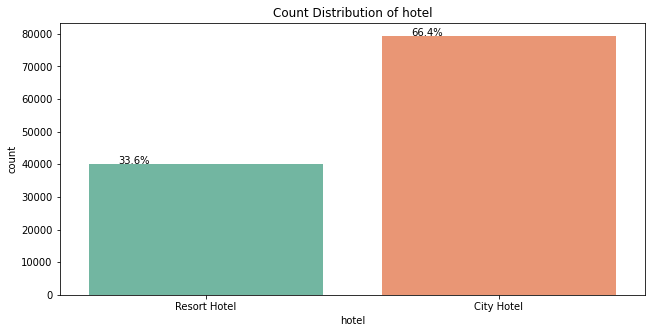

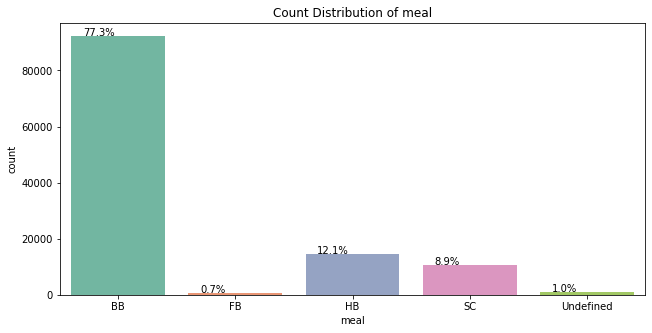

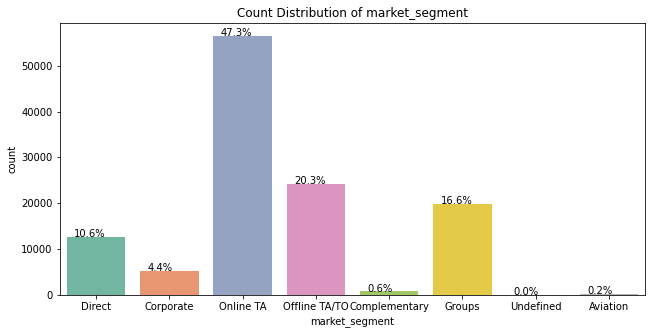

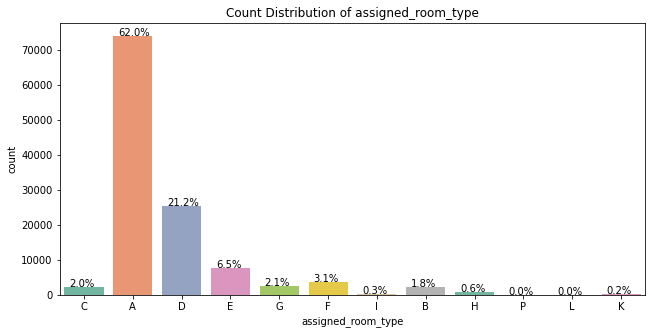

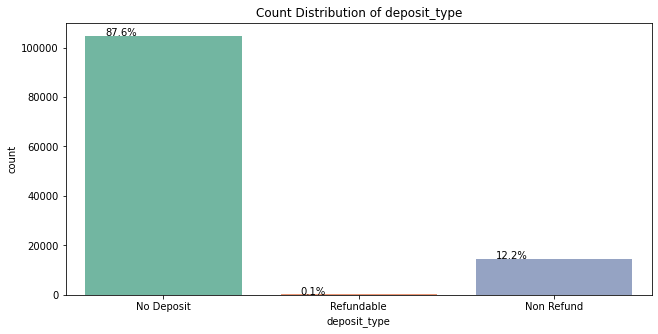

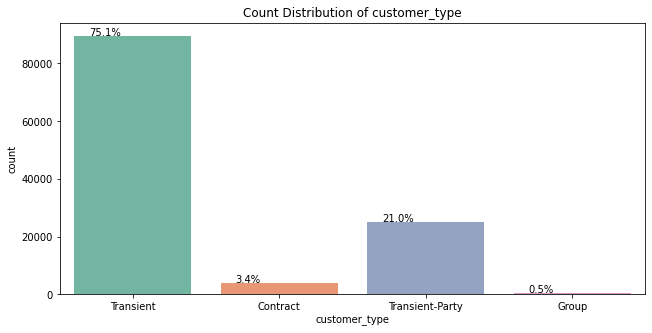

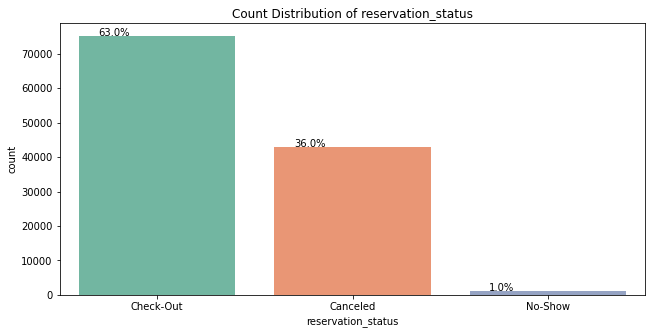

In [43]:
cat_var_to_visualize=['hotel', 'meal', 'market_segment', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status']
plt.rcParams["figure.figsize"] = (10.5,5)
color=sns.color_palette('Set2')
for i in cat_var_to_visualize:
  ax = sns.countplot(x=i, data=df,
                   linewidth=0,
                   edgecolor=sns.color_palette("dark", 10),palette='Set2')
  for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df[i])), (p.get_x()+0.1, p.get_height()+5))
  plt.xlabel(i)
  plt.title("Count Distribution of "+str(i))
  plt.show()

### Visualizing Discrete Variables

In [44]:
Numeric_var_to_visualize=['arrival_date_year', 'arrival_date_month_numeric',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations', 'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests']

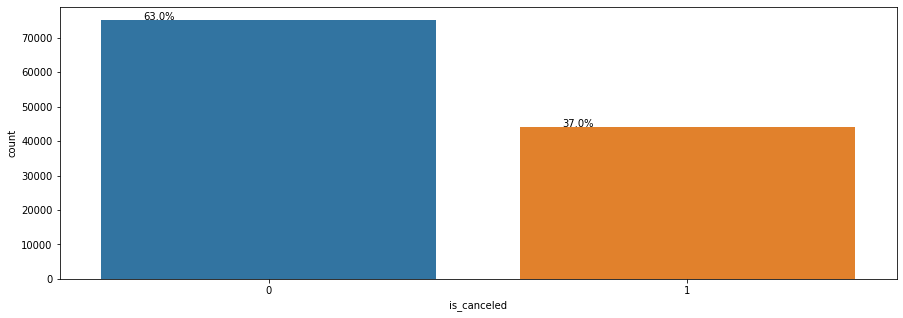

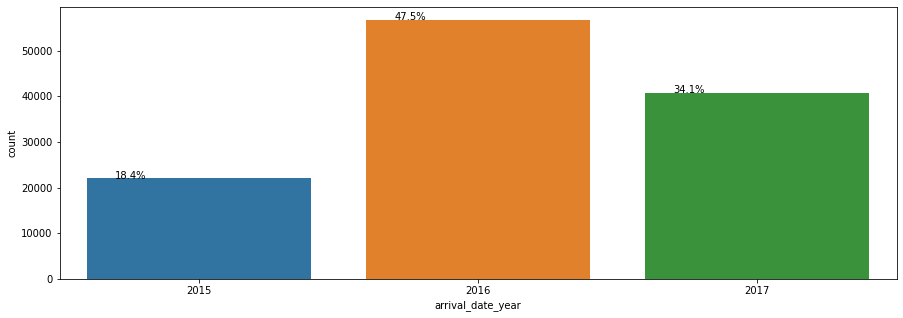

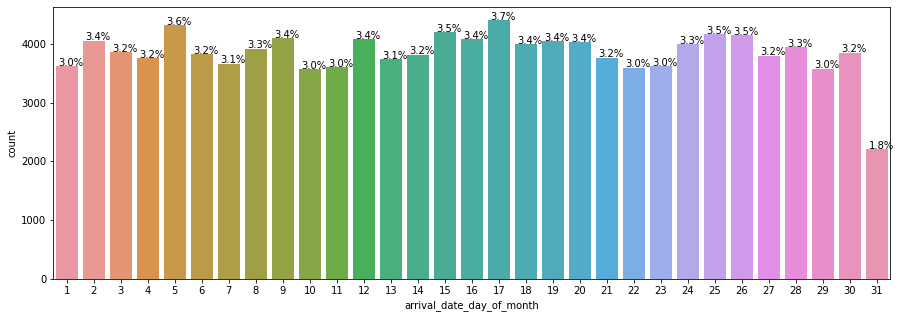

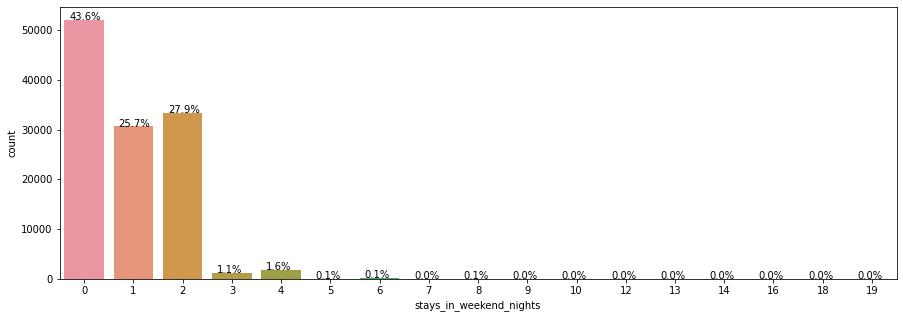

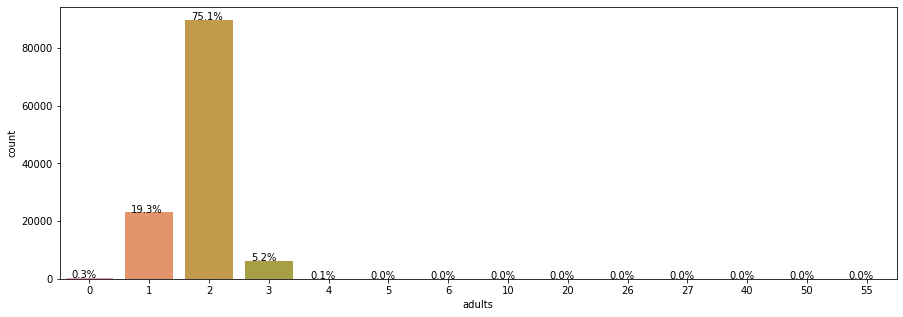

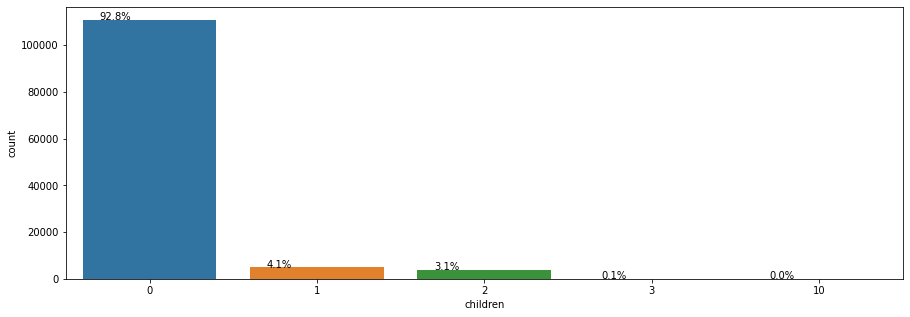

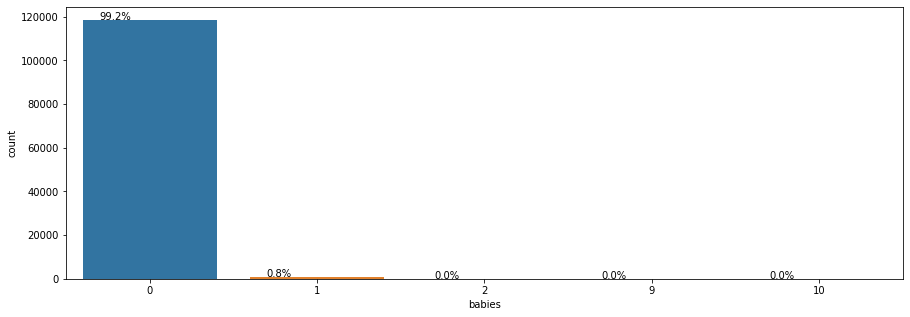

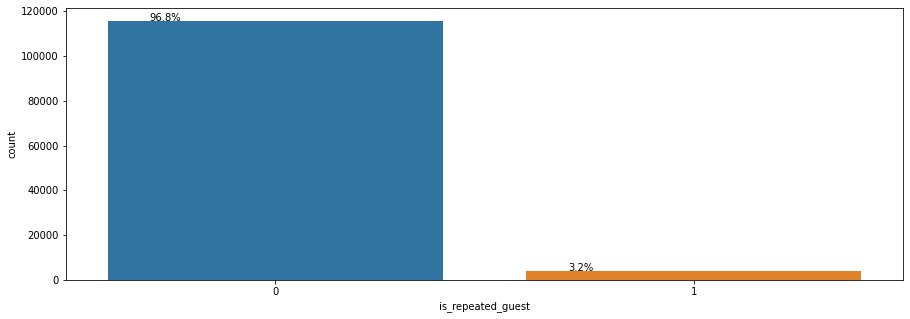

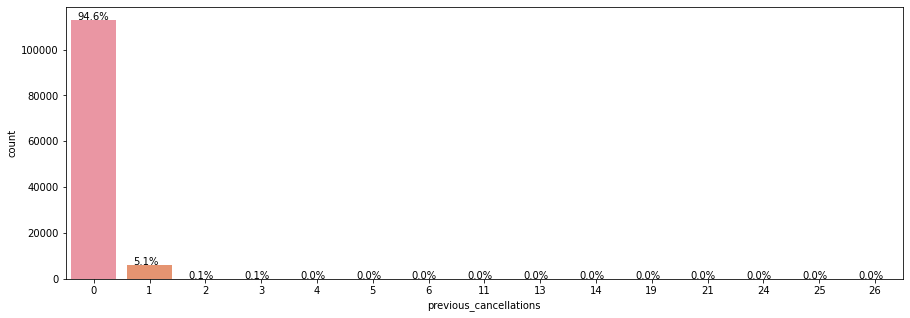

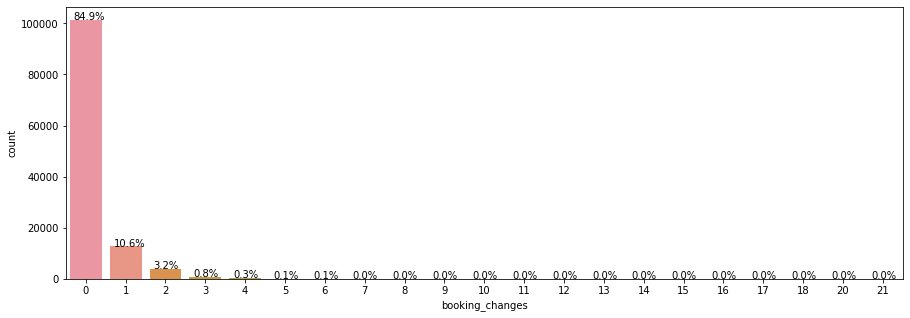

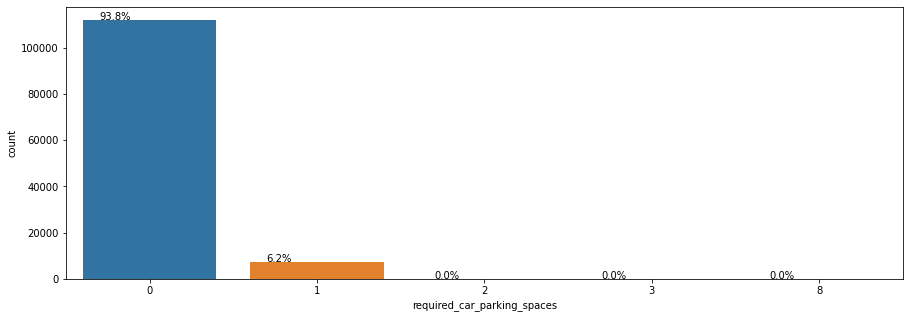

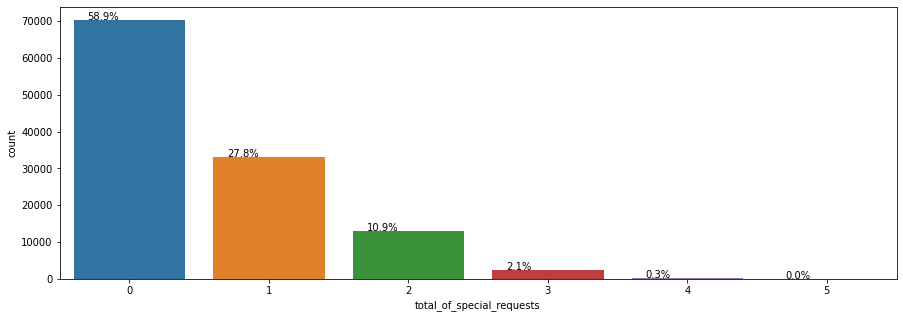

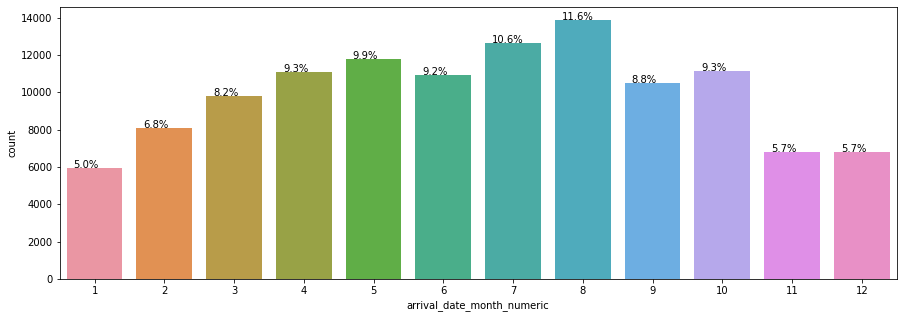

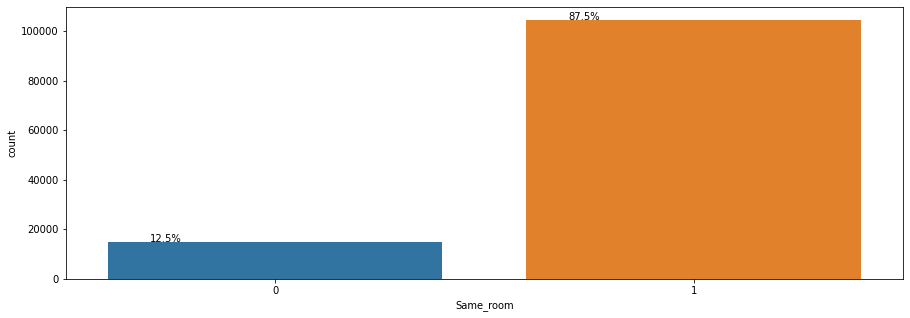

In [45]:
plt.rcParams["figure.figsize"] = (15,5)
for i in discrete_variables:
  ax = sns.countplot(x=i, data=df)
  for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df[i])), (p.get_x()+0.1, p.get_height()+5))
  plt.xlabel(i)
  plt.show()

### Visualizing Continuous Variables

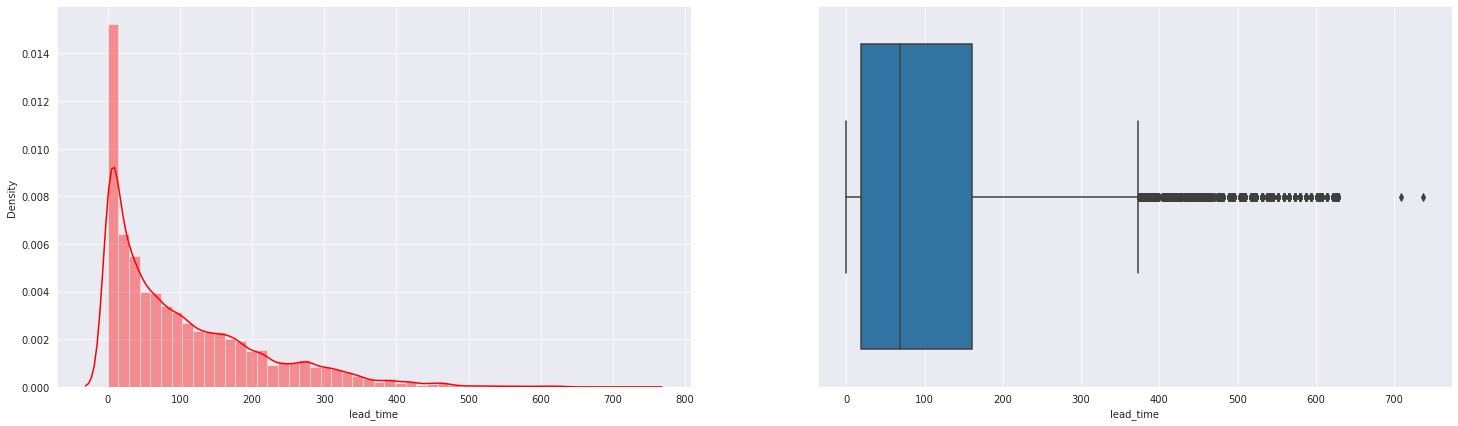

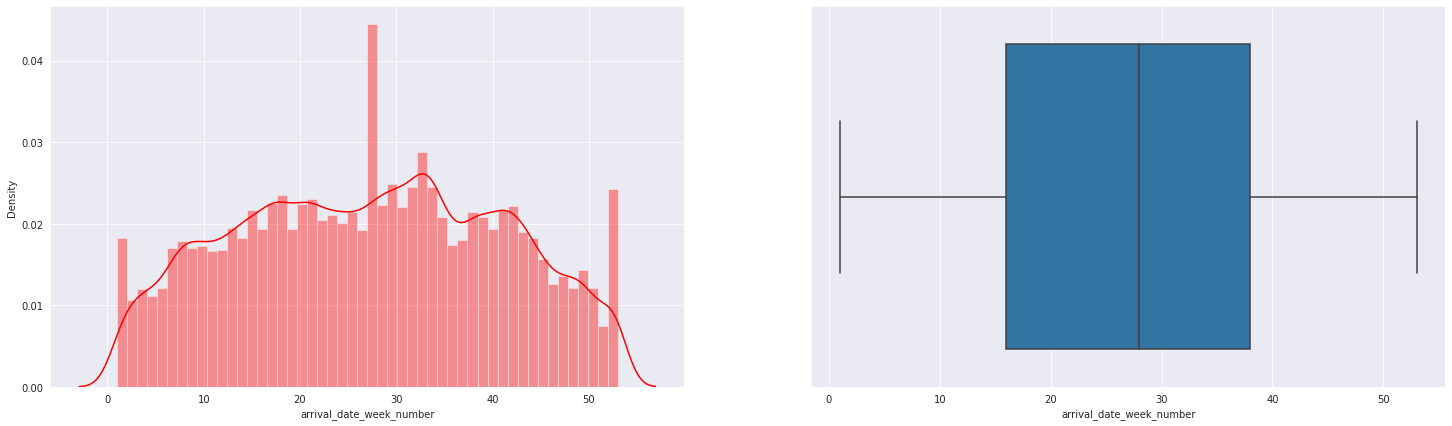

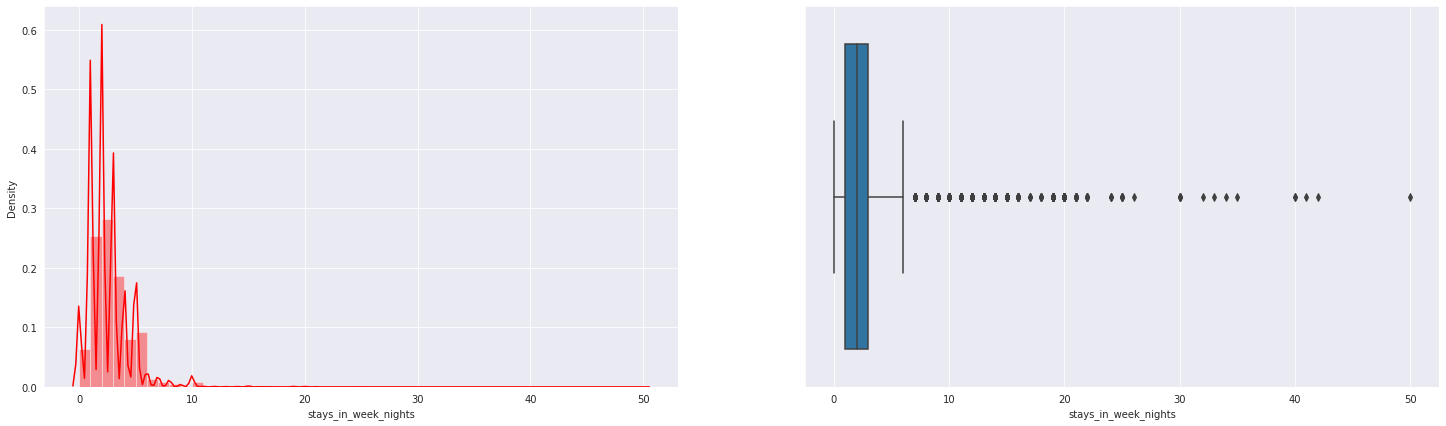

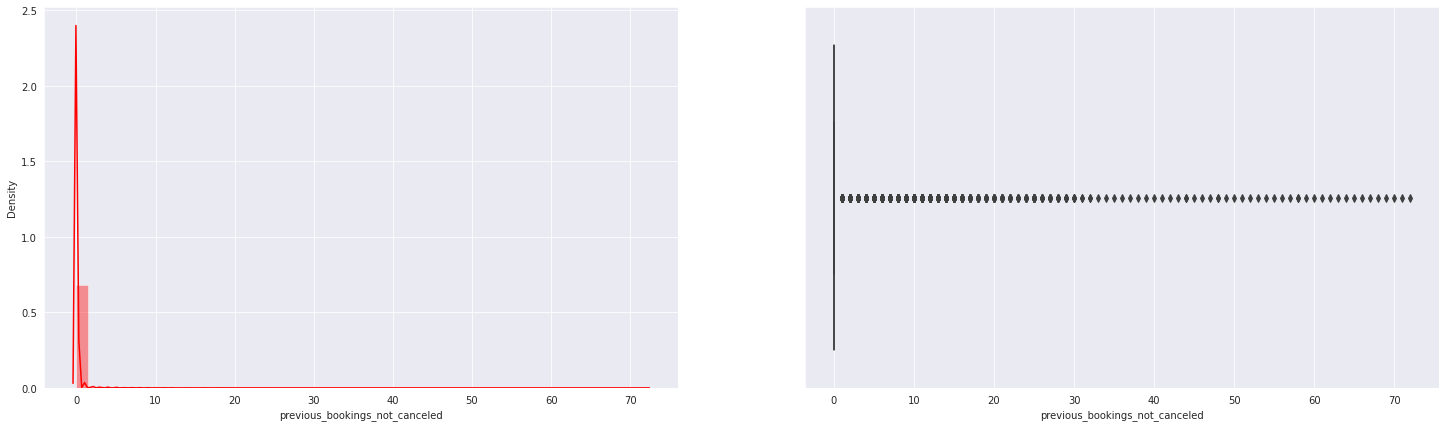

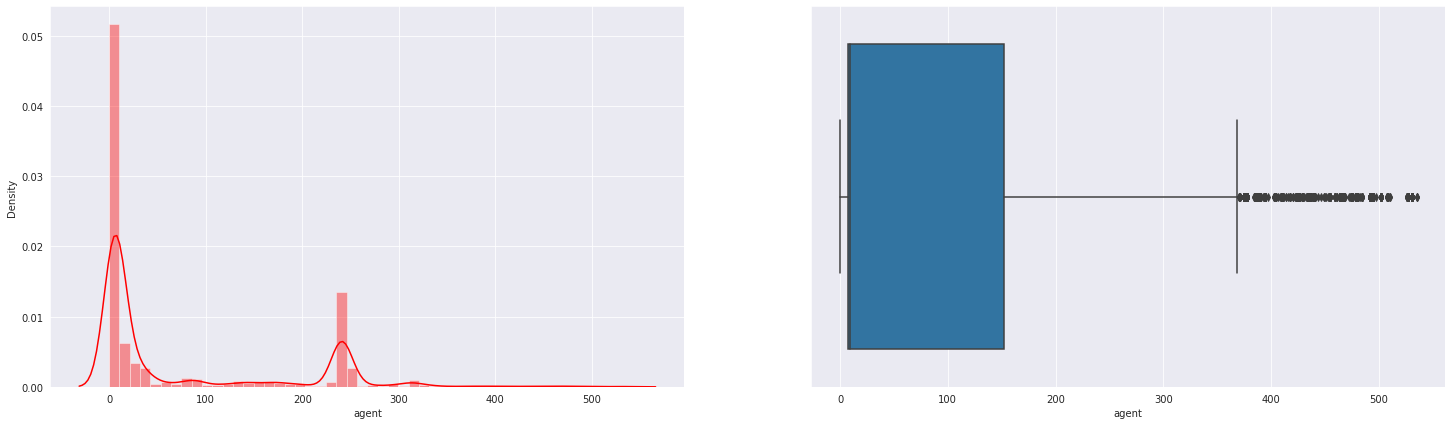

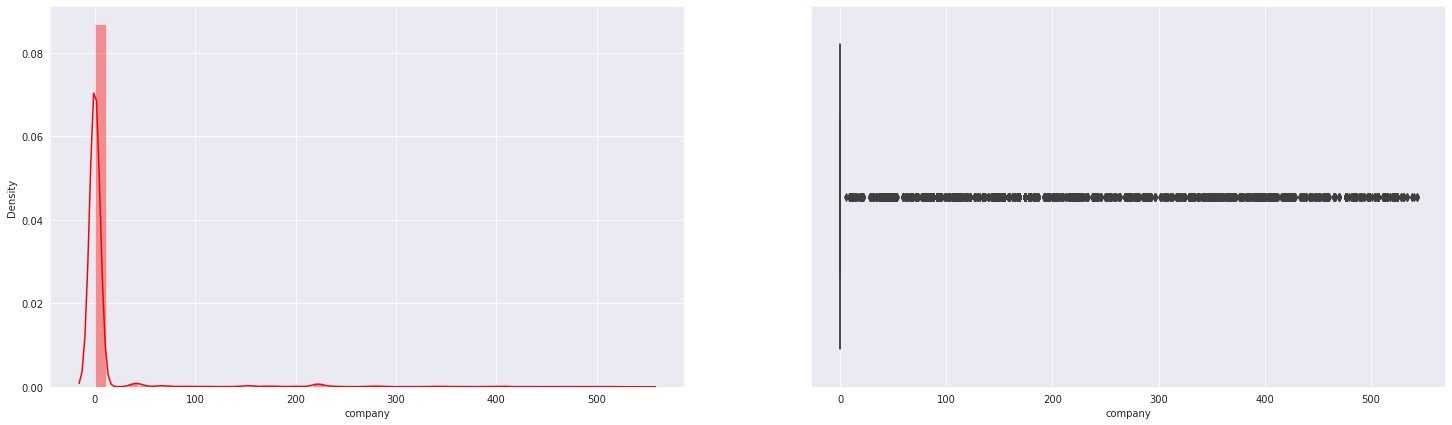

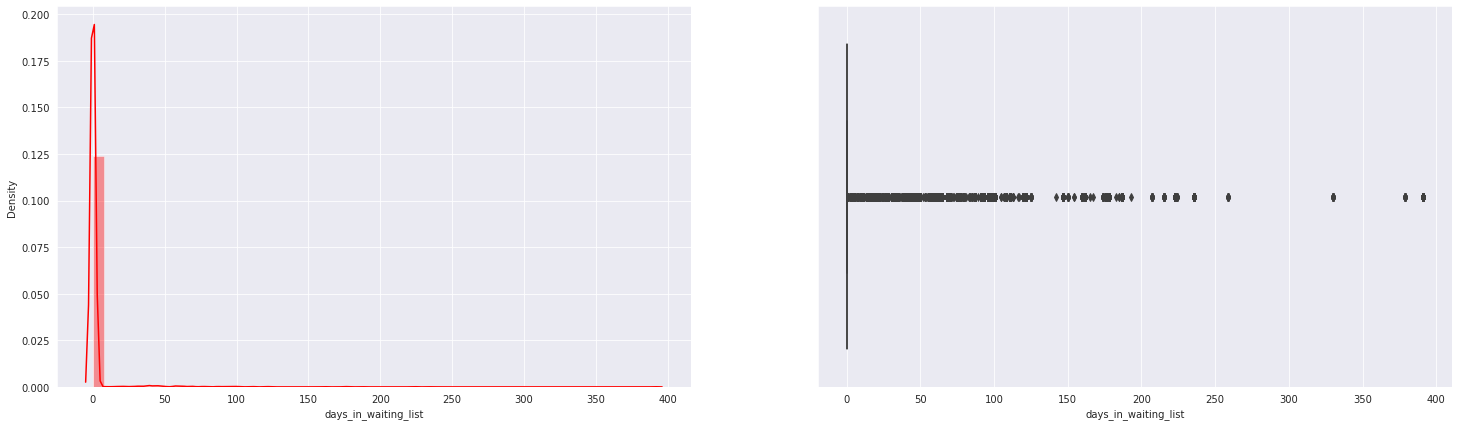

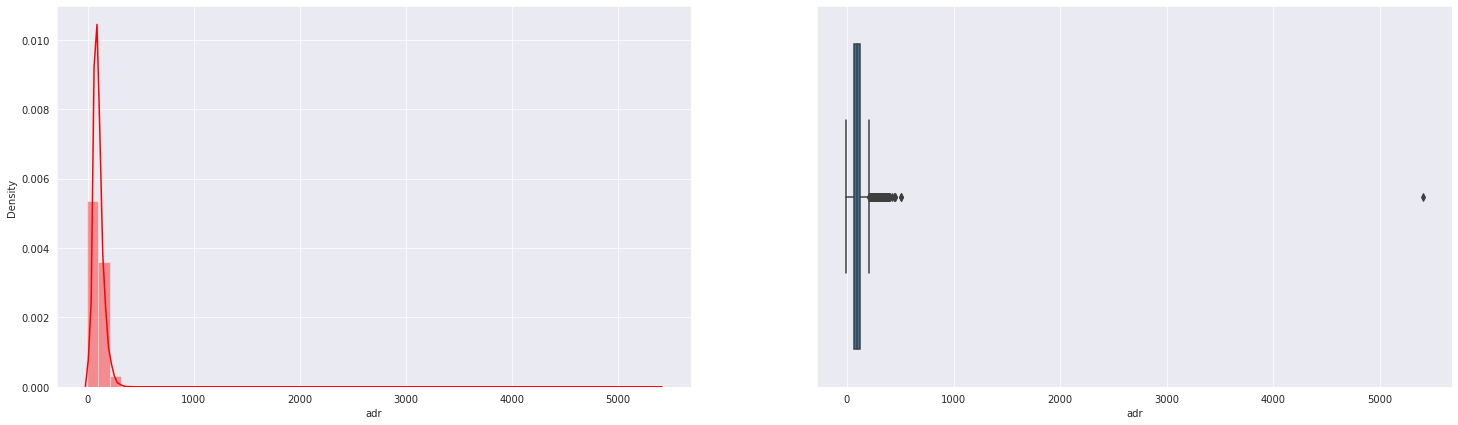

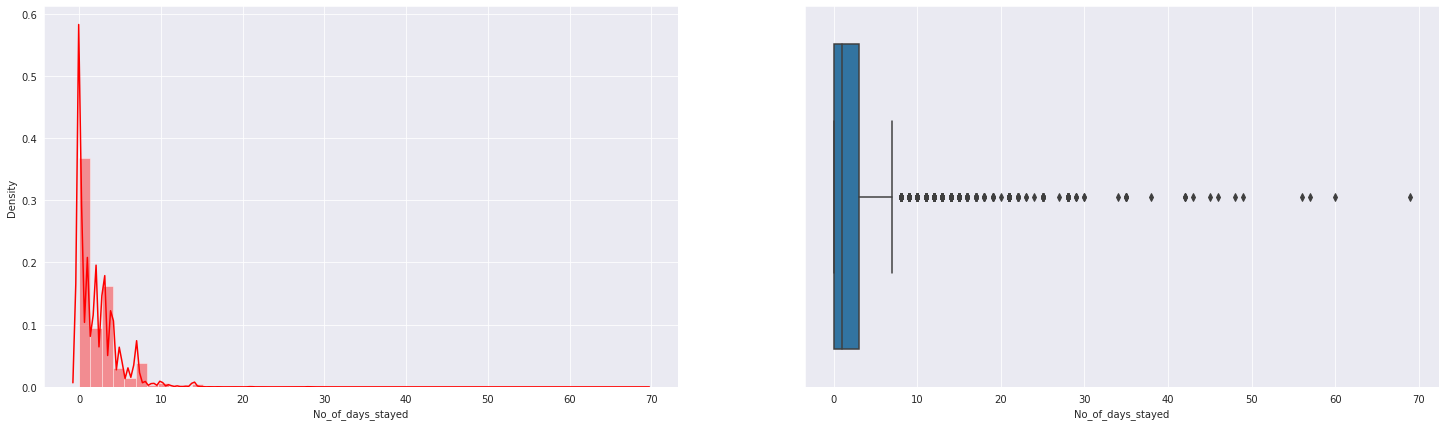

In [46]:
sns.set_style(style='darkgrid')
for index,col in enumerate(df[continuous_variables]):
  plt.figure(figsize=(25,7))
  plt.subplot(1, 2, 1)
  sns.distplot(df[col],color='red')
  plt.subplot(1, 2, 2)
  sns.boxplot(df[col])
  plt.show()

For Non Canceled Bookings lead time is greater than 320 for the months October,September,July, June, August,May which are peak months for hotel bookings.

People with pre planned plans seems to have booked hotels beforehand during these peak seasons.

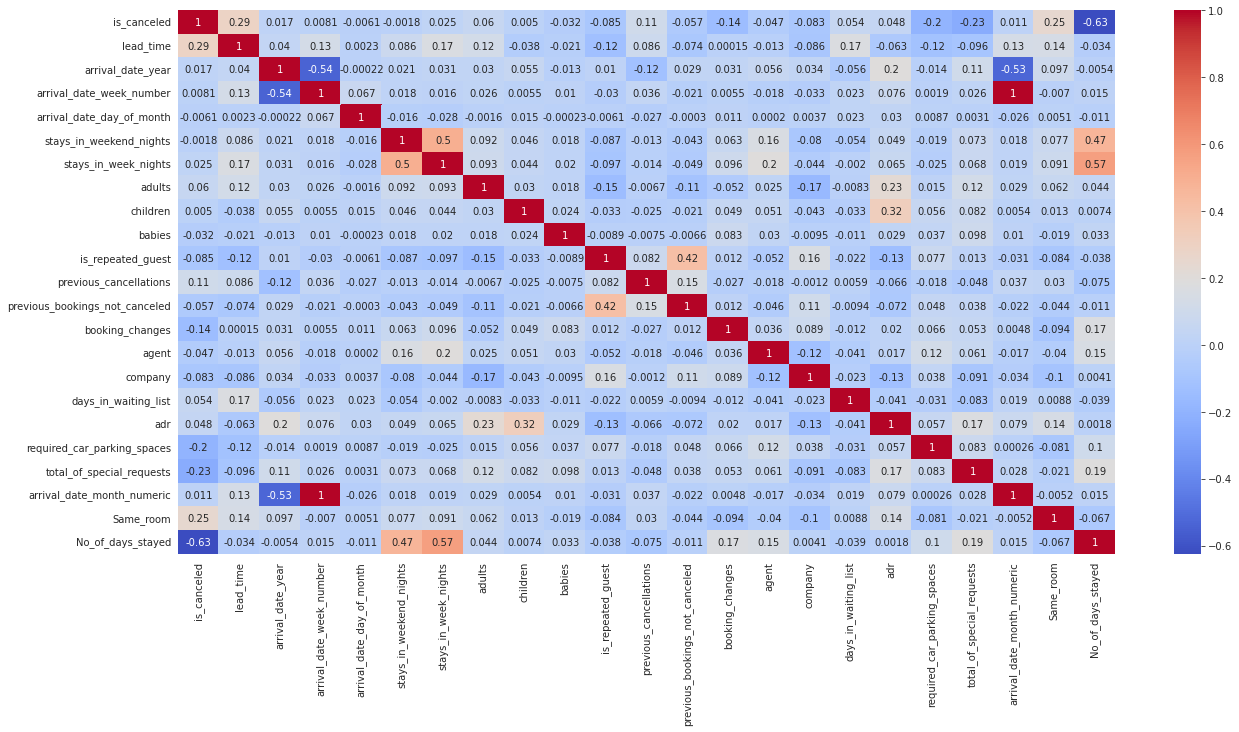

In [47]:
plt.rcParams["figure.figsize"] = (21,10)
correlation=df[Numeric_variables].corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True)
plt.show()

From this heatmap, We can see that lead time is positively correlated with Is_canceled column.

## <b>Bivariate Analysis</b>

In [48]:
def Bivariate_analysis(list_of_cols,col_name,dataframe,color):

  '''This method will plot Bivariate Bar plot of a 
  column passed against the list of columns passed'''

  for i in list_of_cols:
    df_new=dataframe.groupby([i,col_name])[col_name].count().unstack()
    if(len(dataframe[i].unique().tolist())<7):
      ax=df_new.plot.bar(color=color,stacked=False,rot=0,figsize=(12,5),fontsize=9)
    else:
      ax=df_new.plot.bar(color=color,stacked=False,rot=0,figsize=(25,5),fontsize=9)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df[i])), (p.get_x()+0.1, p.get_height()+5))
    plt.title('Count Distribution of '+str(i)+' against '+str(col_name))

In [49]:
var_to_analyze=['is_canceled', 'arrival_date_year',
       'arrival_date_month_numeric', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type']

<Figure size 576x360 with 0 Axes>

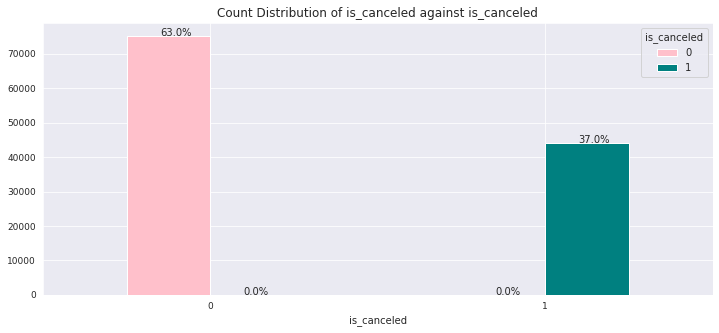

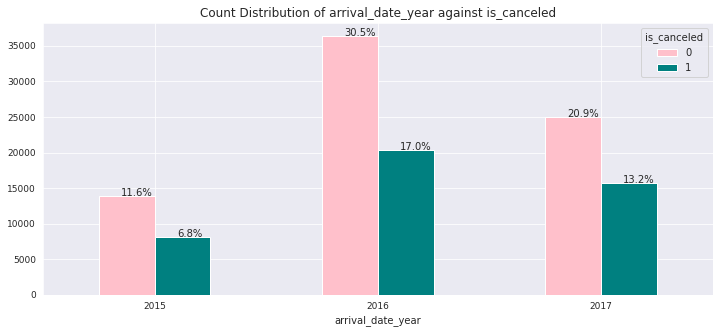

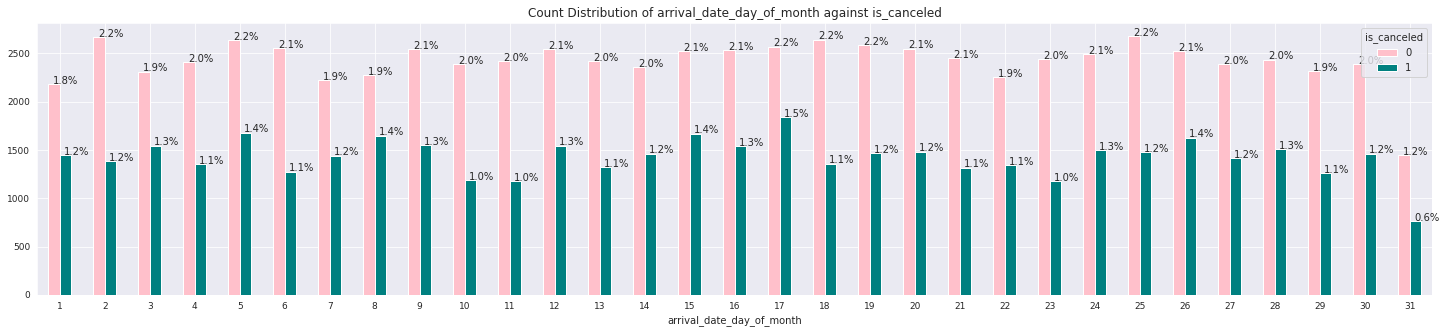

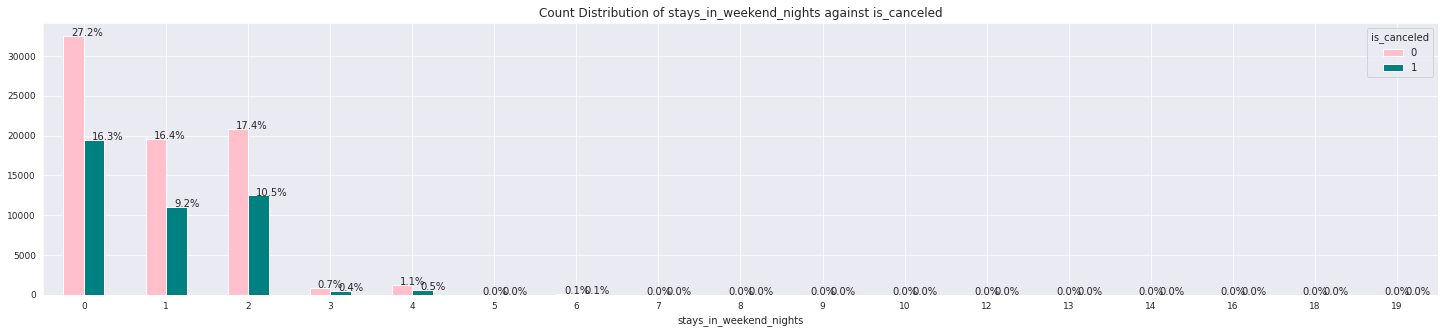

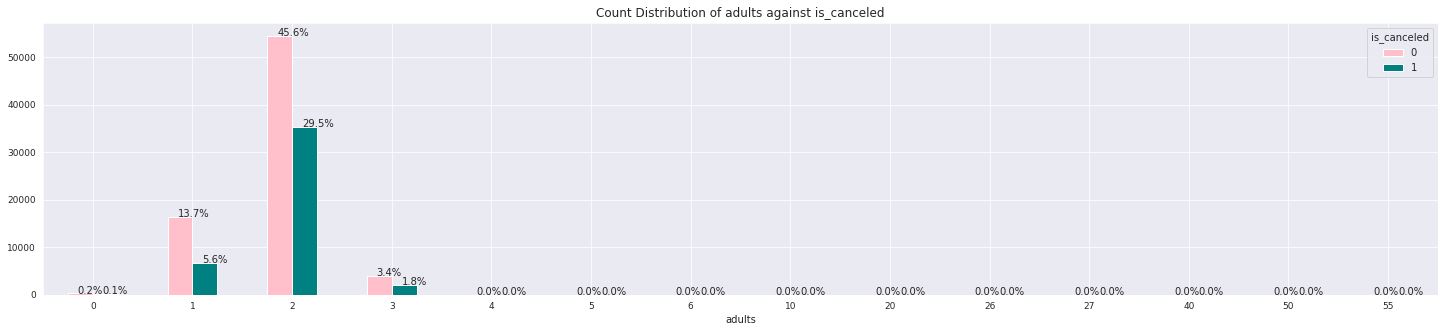

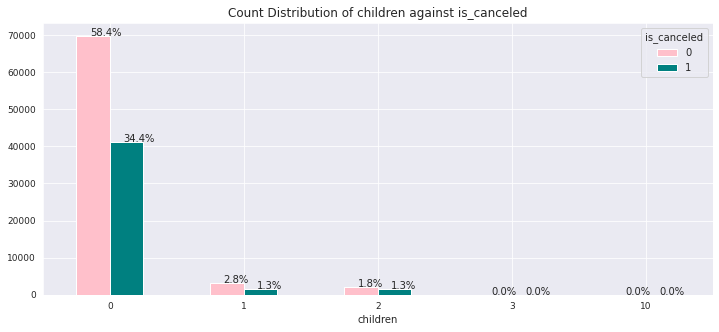

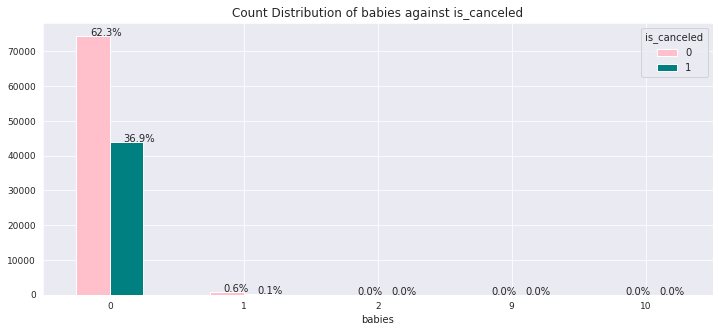

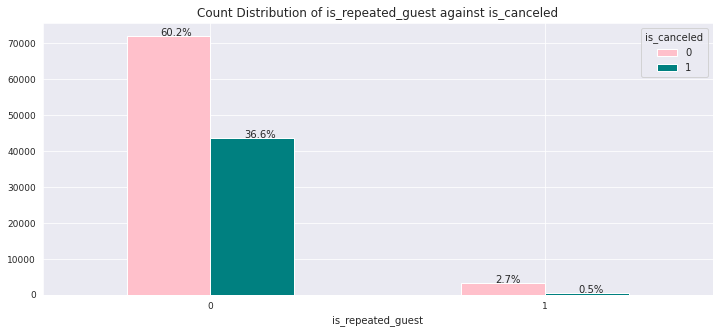

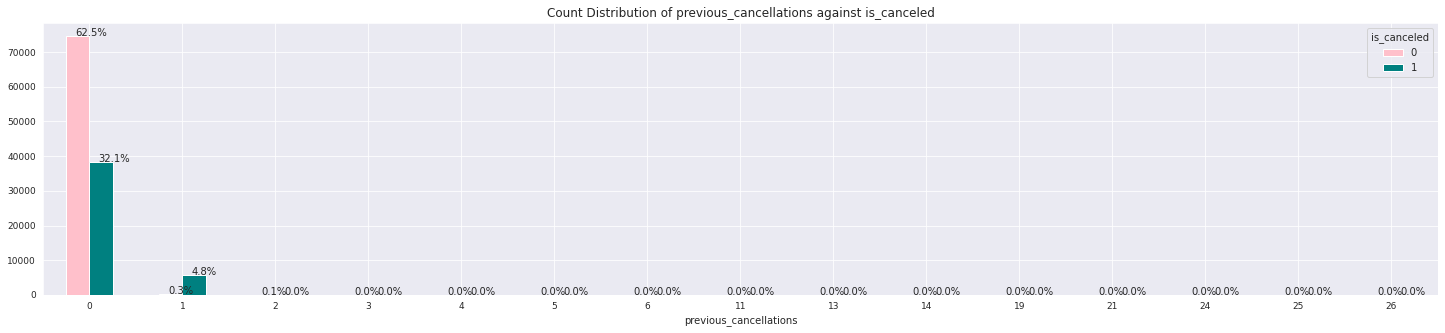

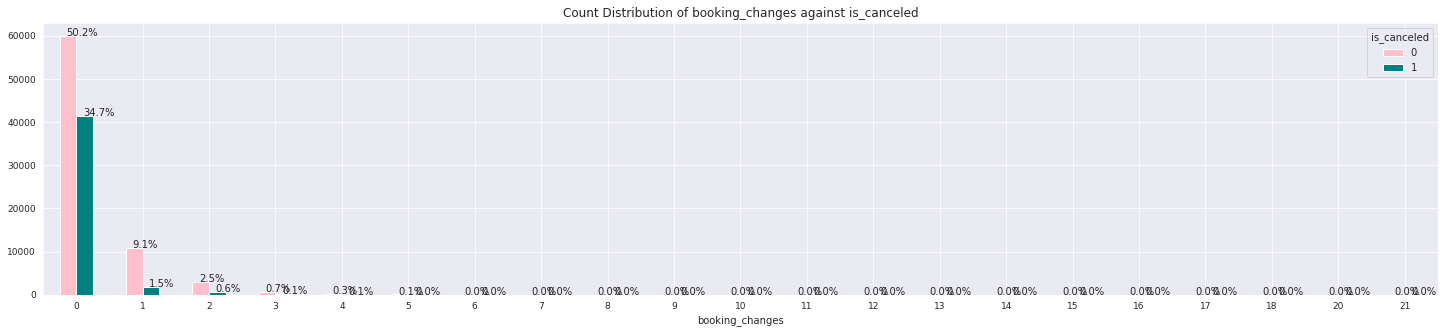

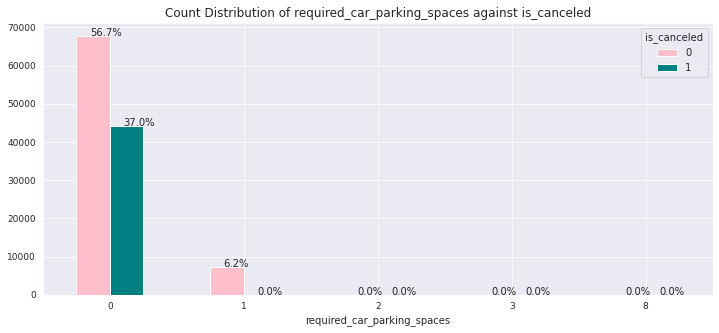

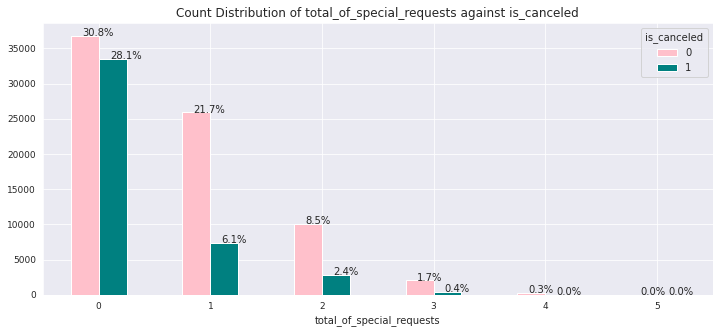

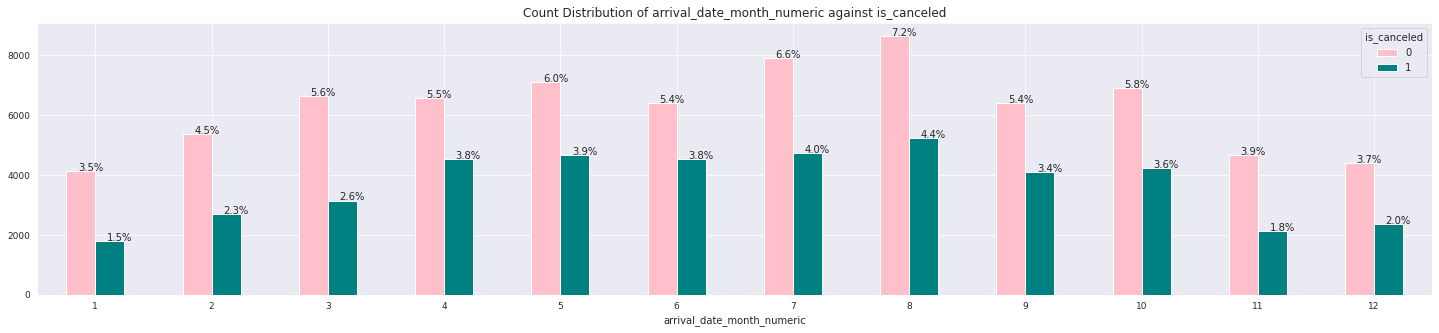

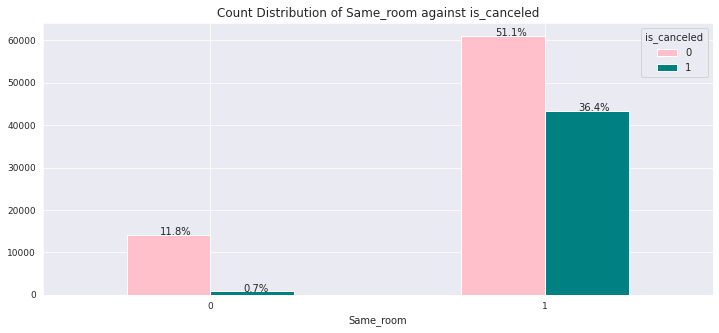

In [50]:
plt.figure(figsize=(8,5))
Bivariate_analysis(discrete_variables,'is_canceled',df,['pink','teal'])

<Figure size 576x360 with 0 Axes>

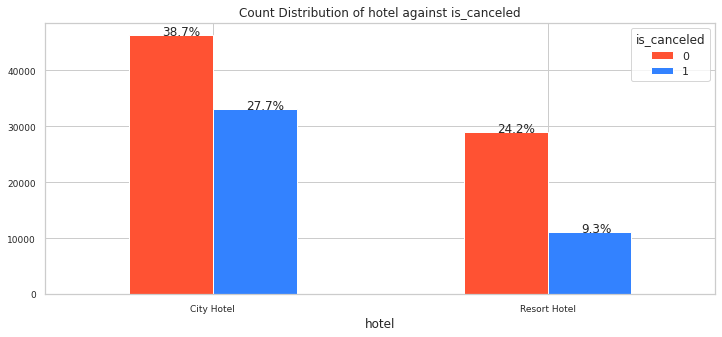

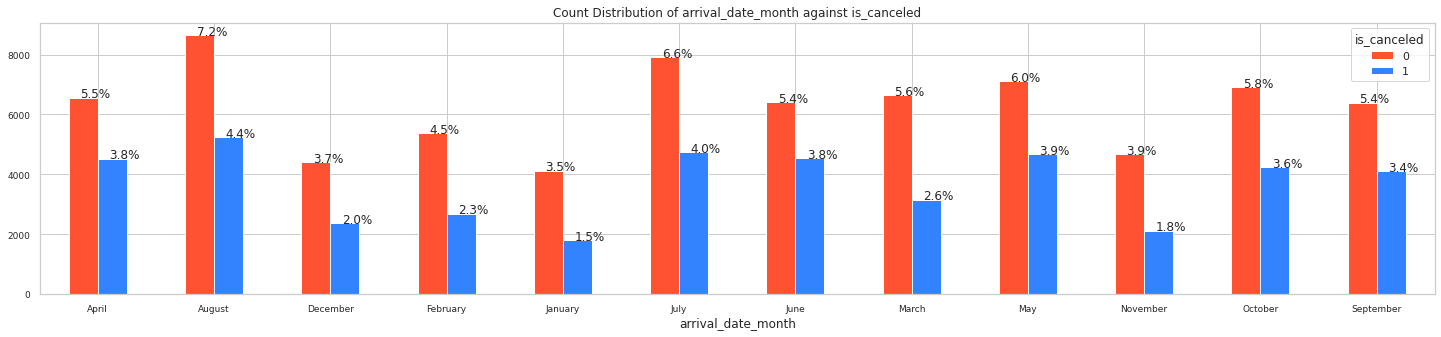

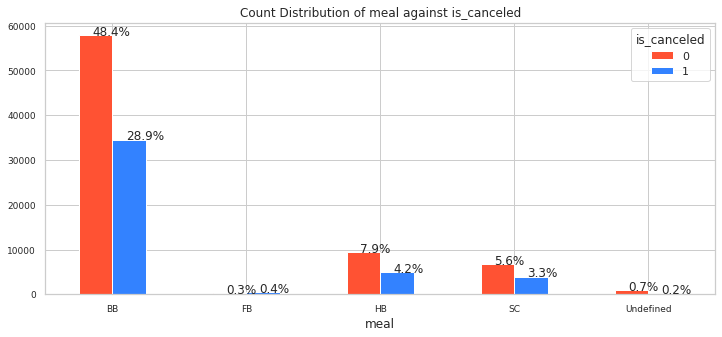

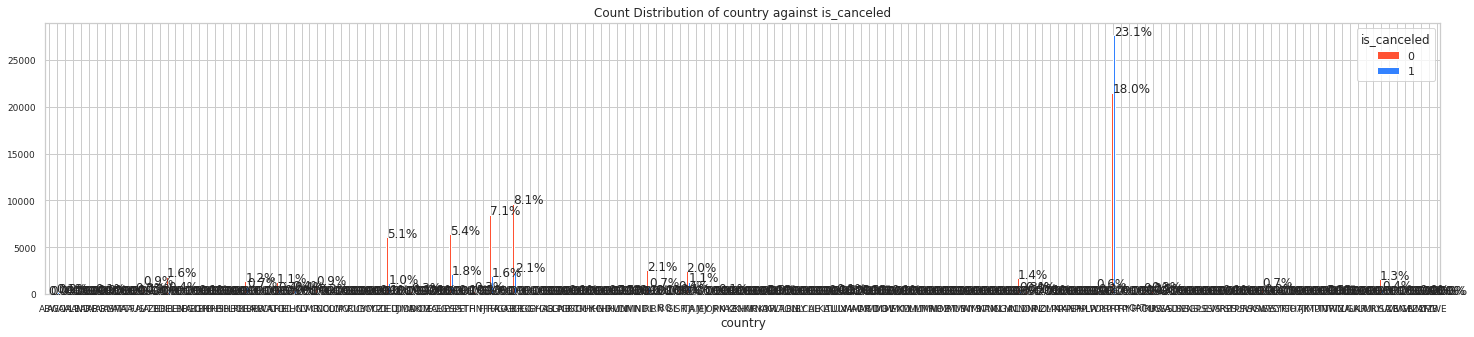

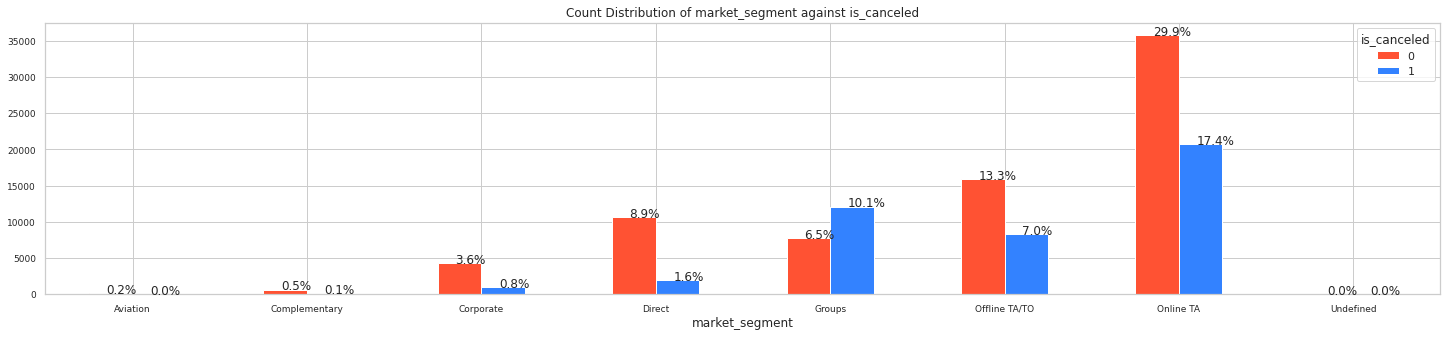

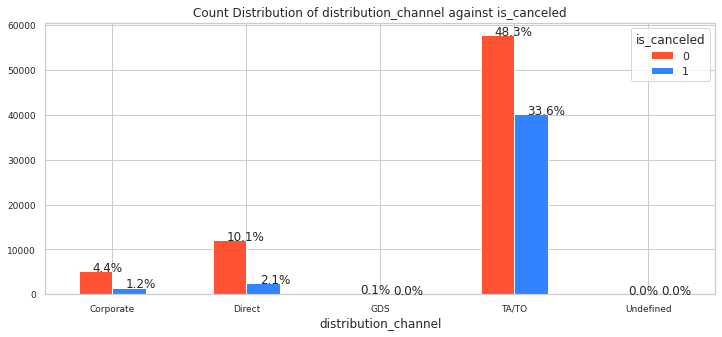

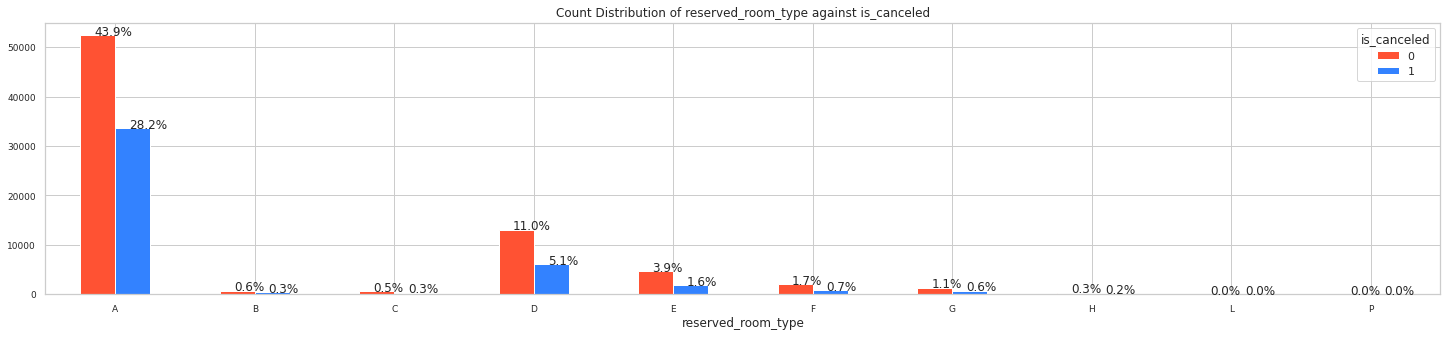

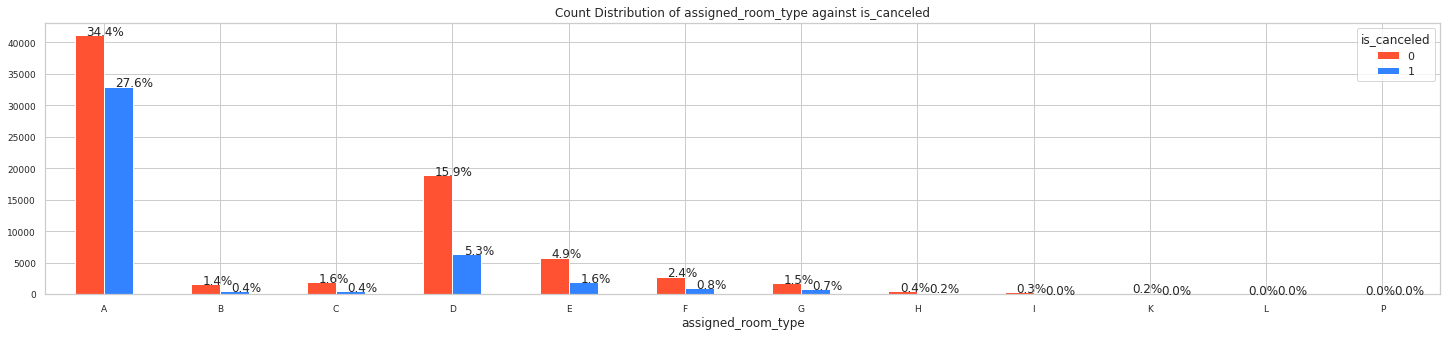

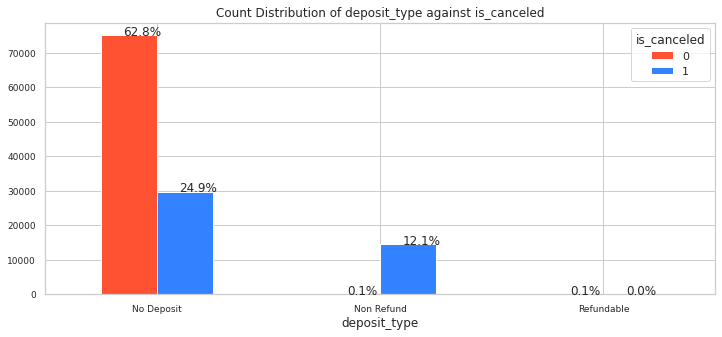

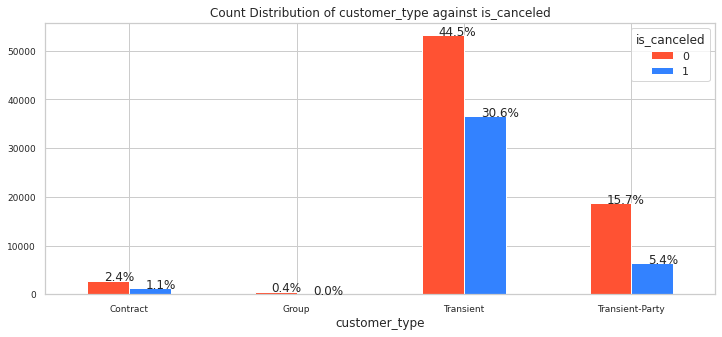

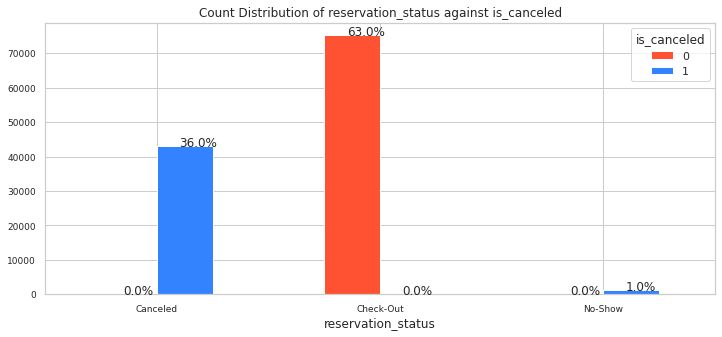

In [219]:
plt.figure(figsize=(8,5))
sns.set_style(style='whitegrid')
Bivariate_analysis(Categorical_variables,'is_canceled',df,['#FF5233','#3382FF'])

Now Analyzing the Is Canceled Factor against various parameter in dataframe

## <b>Monthly Booking Analysis per Year</b>

In [52]:
df_monthly_analysis=df.groupby(['arrival_date_month_numeric','arrival_date_year'])['arrival_date_month_numeric'].count().unstack()
df_monthly_analysis.replace(to_replace=np.NaN,value=0)

arrival_date_year,2015,2016,2017
arrival_date_month_numeric,,,
1,0.0,2248.0,3681.0
2,0.0,3891.0,4177.0
3,0.0,4824.0,4970.0
4,0.0,5428.0,5661.0
5,0.0,5478.0,6313.0
6,0.0,5292.0,5647.0
7,2776.0,4572.0,5313.0
8,3889.0,5063.0,4925.0
9,5114.0,5394.0,0.0


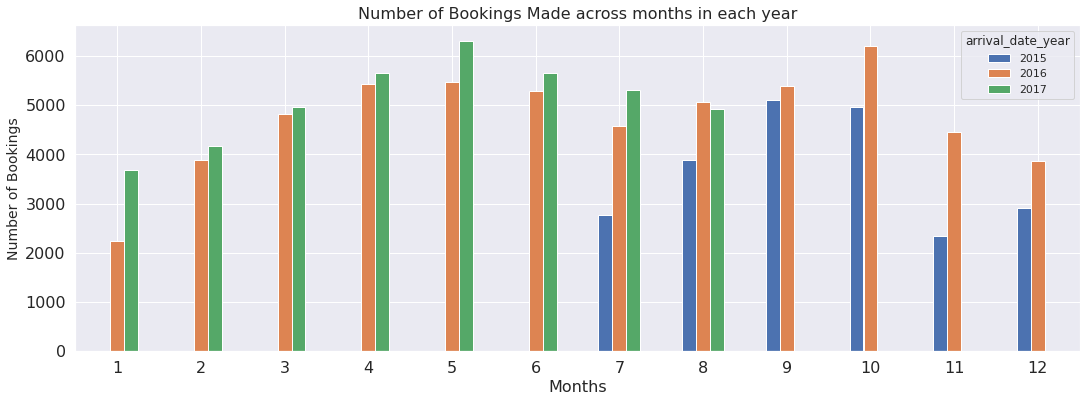

In [53]:
sns.set_theme(style="darkgrid")
df_monthly_analysis.plot.bar(rot=0,figsize=(18,6),fontsize=16,orientation='vertical')
plt.title('Number of Bookings Made across months in each year',fontdict={'fontsize':16})
plt.ylabel('Number of Bookings',fontdict={'fontsize':14})
plt.xlabel('Months',fontdict={'fontsize':16})
plt.show()

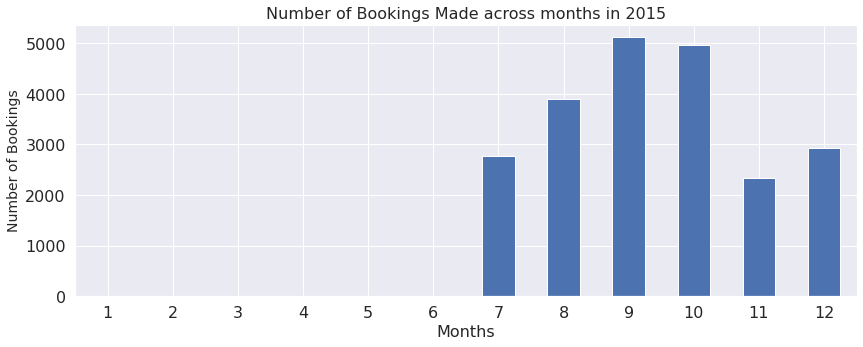

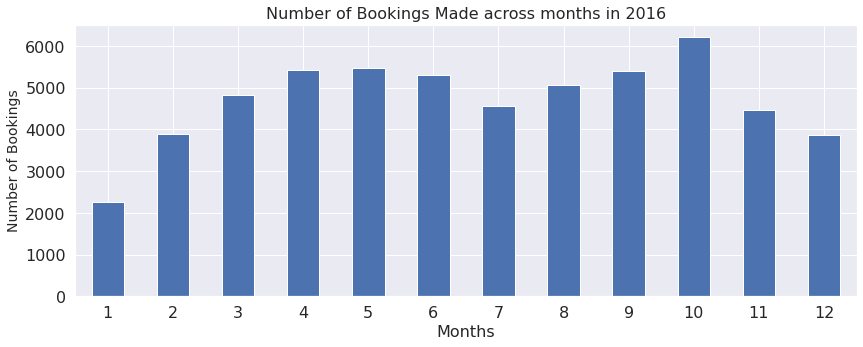

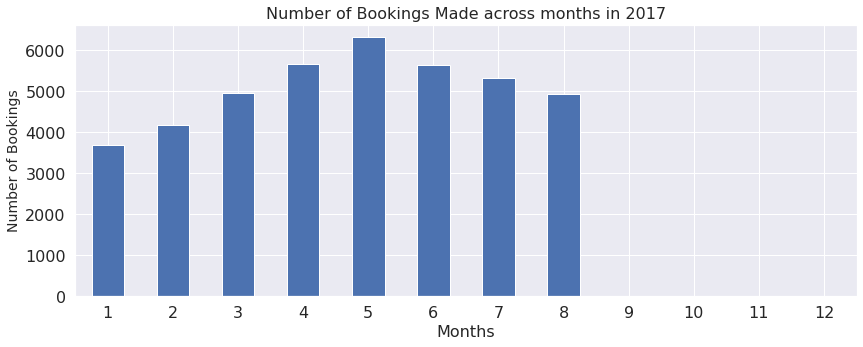

In [54]:
sns.set_theme(style="darkgrid")
for i in df_monthly_analysis.columns.tolist():
  df_monthly_analysis[i].plot.bar(rot=0,figsize=(14,5),fontsize=16,orientation='vertical')
  plt.title('Number of Bookings Made across months in '+str(i),fontdict={'fontsize':16})
  plt.ylabel('Number of Bookings',fontdict={'fontsize':14})
  plt.xlabel('Months',fontdict={'fontsize':16})
  plt.show()

In [55]:
min(df.arrival_date)

Timestamp('2015-07-01 00:00:00')

In [56]:
max(df.arrival_date)

Timestamp('2017-08-31 00:00:00')

This dataset of Hotel Bookings is available of guests from 1 July,2015 to 8 August,2017 which is why we are seeing the hotel bookings for last 8 months for the year 2015 and first 7 months of 2017 

As per this dataset,
Number of hotel bookings are increasing each year


## <b>Revenue Generation Analysis</b>

In [57]:
df_monthly_analysis_adr=df.groupby(['arrival_date_month_numeric','arrival_date_year'])['adr'].mean().unstack()
df_monthly_analysis_adr.replace(to_replace=np.NaN,value=0)

arrival_date_year,2015,2016,2017
arrival_date_month_numeric,,,
1,0.000000,64.767656,73.777264
2,0.000000,70.102269,76.824005
3,0.000000,79.069326,82.242660
4,0.000000,88.918920,111.370903
5,0.000000,96.399286,119.365364
6,0.000000,106.977315,125.757599
7,97.834316,125.484536,143.037770
8,105.922888,142.893595,164.248370
9,94.818662,114.749566,0.000000


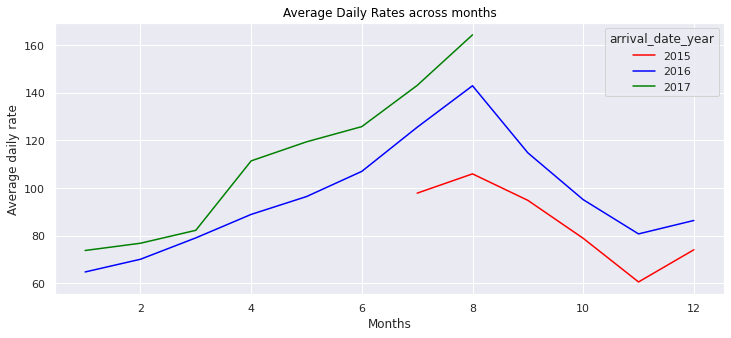

In [58]:
plt.rcParams['figure.figsize'] = (12, 5)
df_monthly_analysis_adr.plot(kind='line',color=['red','blue','green'])
plt.xlabel('Months')
plt.ylabel('Average daily rate')
plt.title('Average Daily Rates across months',color='black')
plt.show()

In all three years Average Daily rates increases adruptly during the month of August (Month in which demand increases)

And it is also observed that Average rates are increasing each passing year

#### Creating a DataFrame with selected desired infos about Revenue 

In [59]:
def amount_for_stay(reservation_status,adr,no_of_days):
  if (reservation_status=='Canceled' or reservation_status=='No-Show'):
    return 0
  else:
    return adr*no_of_days

In [60]:
df_revenue=df[['hotel','is_canceled','adr','deposit_type','reservation_status_date','arrival_date_year','arrival_date_month_numeric','arrival_date','market_segment','reservation_status','No_of_days_stayed','customer_type']]
df_revenue['Amount']= df_revenue.apply(lambda x : amount_for_stay(x['reservation_status'],x['adr'],x['No_of_days_stayed']),axis=1)
df_revenue.head()

,hotel,is_canceled,adr,deposit_type,reservation_status_date,arrival_date_year,arrival_date_month_numeric,arrival_date,market_segment,reservation_status,No_of_days_stayed,customer_type,Amount
0,Resort Hotel,0,0.0,No Deposit,2015-07-01,2015,7,2015-07-01,Direct,Check-Out,0,Transient,0.0
1,Resort Hotel,0,0.0,No Deposit,2015-07-01,2015,7,2015-07-01,Direct,Check-Out,0,Transient,0.0
2,Resort Hotel,0,75.0,No Deposit,2015-07-02,2015,7,2015-07-01,Direct,Check-Out,1,Transient,75.0
3,Resort Hotel,0,75.0,No Deposit,2015-07-02,2015,7,2015-07-01,Corporate,Check-Out,1,Transient,75.0
4,Resort Hotel,0,98.0,No Deposit,2015-07-03,2015,7,2015-07-01,Online TA,Check-Out,2,Transient,196.0


#### Revenue generated throughout the years

Amount             
hotel              City Hotel Resort Hotel
arrival_date_year                         
2015               1893367.54   2612946.16
2016               6862128.00   4801060.78
2017               5636721.64   4173241.23

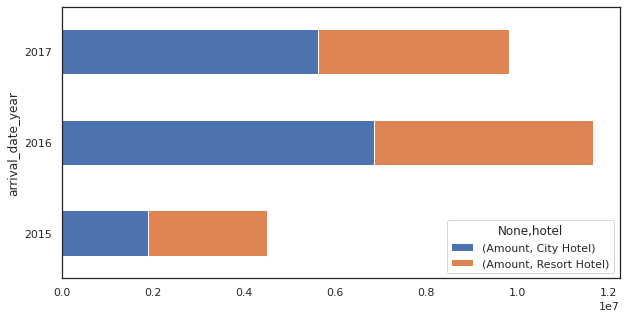

In [61]:
sns.set_theme(style='white')
df_new=pd.DataFrame(df_revenue.groupby(['arrival_date_year','hotel'])['Amount'].sum()).unstack()
df_new.replace(to_replace=np.NaN,value=0,inplace=True)
ax=df_new.plot(kind='barh',figsize=(10,5),stacked=True)
df_new

Revenue generation is max in 2016 that is because we have data throughout the year 2016, But comparing data of 2016 and 2017 almost 2016's revenue is touched in 2017 in 8 months only, which signifies 2017 as profitable year

#### Revenue generated throughout the months

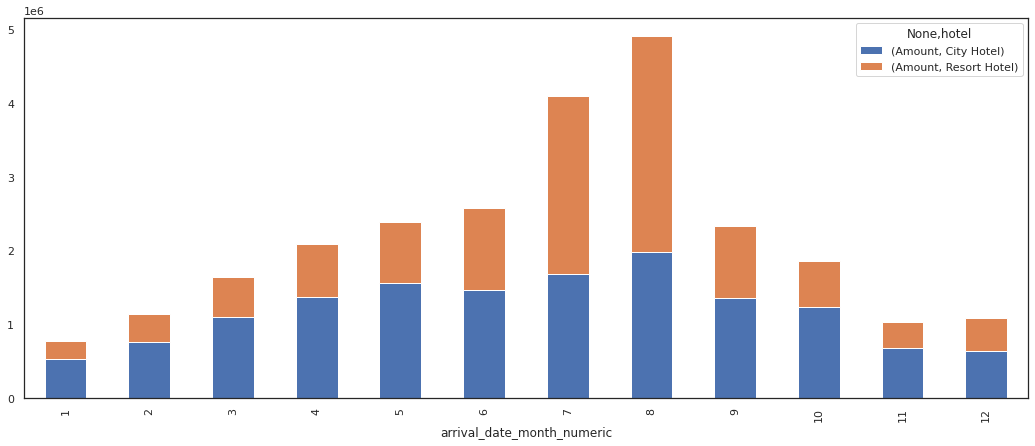

Amount             
hotel                       City Hotel Resort Hotel
arrival_date_month_numeric                         
1                            527932.98    248743.86
2                            768886.74    378654.74
3                           1096602.16    555496.43
4                           1369897.57    729959.91
5                           1569623.77    825547.87
6                           1466631.67   1113418.85
7                           1685861.58   2408180.28
8                           1978102.45   2937846.17
9                           1359321.31    980662.04
10                          1241013.13    614676.59
11                           687443.09    348109.87
12                           640900.73    445951.56

In [62]:
sns.set_theme(style='white')
df_new=pd.DataFrame(df_revenue.groupby(['arrival_date_month_numeric','hotel'])['Amount'].sum()).unstack()
df_new.replace(to_replace=np.NaN,value=0,inplace=True)
df_new.plot(kind='bar',figsize=(18,7),stacked=True)
plt.show()
df_new

Months from May to October seems to be genrating major part of revenue as these are peak months and also adr increases during these months.

#### Revenue generated from various Market segments

In [63]:
df_new=pd.DataFrame(df_revenue.groupby(['market_segment','hotel'])['Amount'].sum()).unstack()
df_new.replace(to_replace=np.NaN,value=0,inplace=True)
df_new

Amount             
hotel           City Hotel Resort Hotel
market_segment                         
Aviation          70868.36         0.00
Complementary      2743.00      2069.53
Corporate        365675.40    212236.79
Direct          1657750.07   2441103.50
Groups           980788.50    887751.26
Offline TA/TO   2553625.33   3092799.19
Online TA       8760766.52   4951287.90
Undefined             0.00         0.00

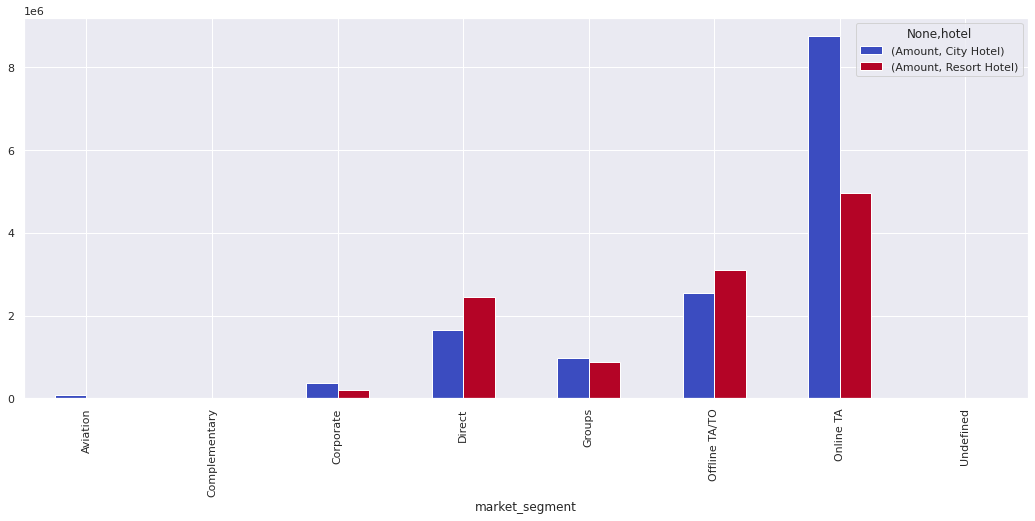

In [64]:
sns.set_style(style='darkgrid')
df_new.plot(kind='bar',figsize=(18,7),legend=True,colormap='coolwarm')
plt.show()

Evidently from the above plot, Online TA is generating maximum revenue of bookings

#### Revenue generated from Different Customer Types

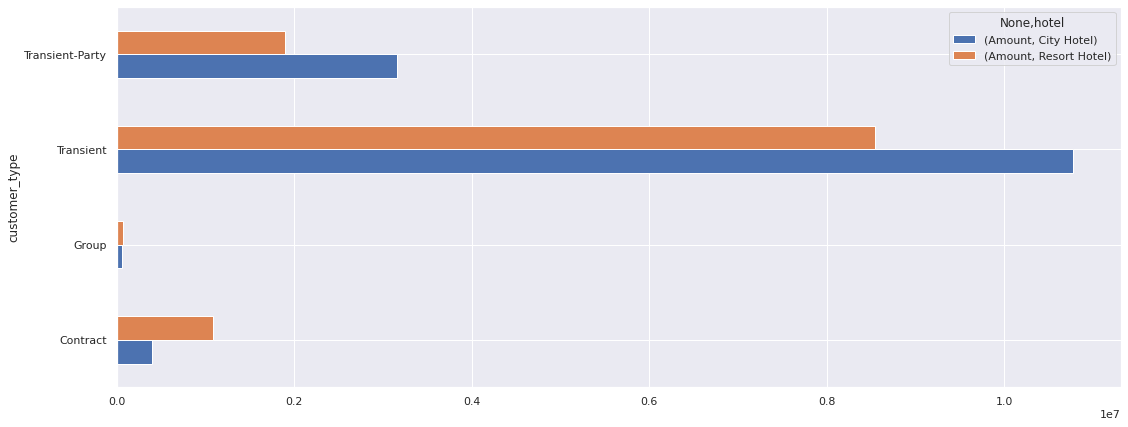

Amount             
hotel             City Hotel Resort Hotel
customer_type                            
Contract           397975.91   1086276.57
Group               56821.50     66533.60
Transient        10777761.10   8541215.98
Transient-Party   3159658.67   1893222.02

In [65]:
df_new=pd.DataFrame(df_revenue.groupby(['customer_type','hotel'])['Amount'].sum()).unstack()
df_new.replace(to_replace=np.NaN,value=0,inplace=True)
sns.set_style(style='darkgrid')
df_new.plot(kind='barh',figsize=(18,7),legend=True)
plt.show()
df_new

#### Q : Transient Customers are booking through which Market Segment

In [66]:
df_revenue[df_revenue.customer_type=='Transient']['market_segment'].value_counts(normalize=True)

Online TA        0.572450
Offline TA/TO    0.156830
Direct           0.126500
Groups           0.094038
Corporate        0.039905
Complementary    0.007845
Aviation         0.002433
Name: market_segment, dtype: float64

For Transient Customer Type 57% bookings were made through Online TA market segment 

## <b>Deposit Type Analysis</b>

In [231]:
df_new=df_new=pd.DataFrame(df_revenue.groupby(['deposit_type','is_canceled'])['is_canceled'].count()).unstack()
df_new.replace(to_replace=np.NaN,value=0,inplace=True)
df_new

is_canceled       
is_canceled            0      1
deposit_type                   
No Deposit         74947  29694
Non Refund            93  14494
Refundable           126     36

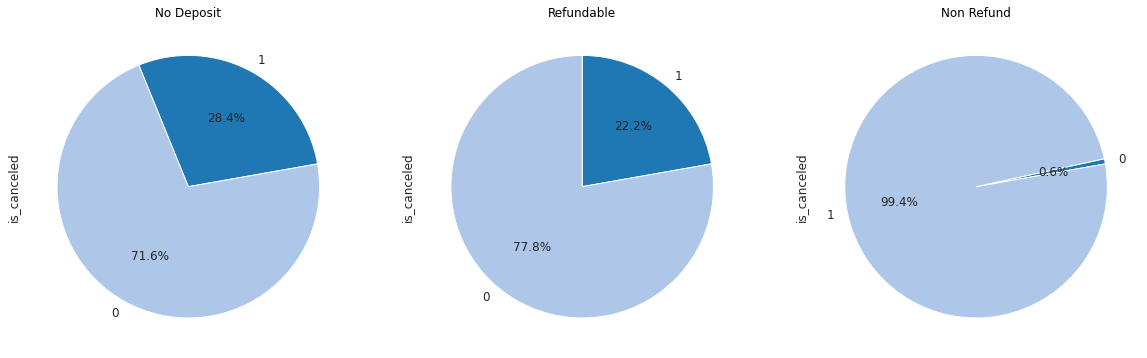

In [263]:
plt.figure(figsize=(20,7))  
colors = sns.color_palette('tab20')[0:5]
for i in df.deposit_type.unique().tolist():
  plt.subplot(1, 3, (df.deposit_type.unique().tolist().index(i))+1) 
  deposit_df=df[df.deposit_type==i]
  deposit_df.is_canceled.value_counts()[::-1].plot(kind = 'pie', autopct='%1.1f%%', fontsize=12,startangle=10,colors = colors)
  plt.title(i,color='black')

Even if Booking Amount is non refundable 99.4% times people canceled their bookings.

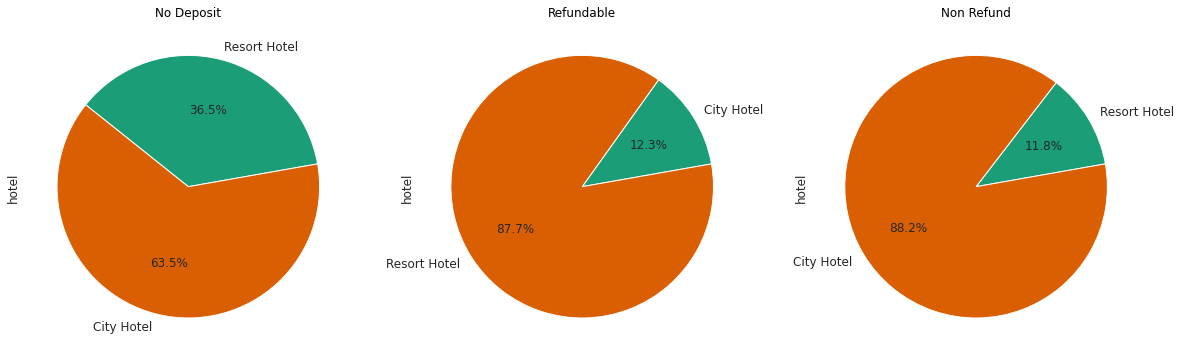

In [261]:
plt.figure(figsize=(20,7))
colors = sns.color_palette('Dark2')[0:5]
for i in df.deposit_type.unique().tolist():
  plt.subplot(1, 3, (df.deposit_type.unique().tolist().index(i))+1) 
  deposit_df=df[df.deposit_type==i]
  deposit_df.hotel.value_counts()[::-1].plot(kind = 'pie', autopct='%1.1f%%', fontsize=12,startangle=10,colors = colors)
  plt.title(i,color='black')

Mostly City Hotels have prior no deposit and non refundable policy on bookings whereas Resort Hotels have refundable amount policy upon cancellation

## <b>Room type Analysis</b>

In [69]:
df_room_type=df[['is_canceled','assigned_room_type','reserved_room_type','Same_room','adults','children','total_of_special_requests','babies','customer_type','market_segment','meal']]
df_room_type.head()

,is_canceled,assigned_room_type,reserved_room_type,Same_room,adults,children,total_of_special_requests,babies,customer_type,market_segment,meal
0,0,C,C,1,2,0,0,0,Transient,Direct,BB
1,0,C,C,1,2,0,0,0,Transient,Direct,BB
2,0,C,A,0,1,0,0,0,Transient,Direct,BB
3,0,A,A,1,1,0,0,0,Transient,Corporate,BB
4,0,A,A,1,2,0,1,0,Transient,Online TA,BB


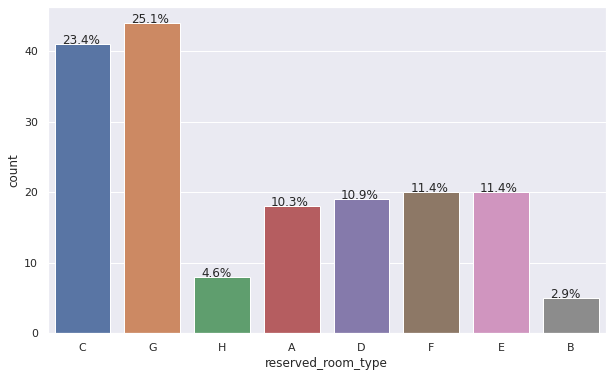

In [70]:
plt.figure(figsize=(10,6))
x=df_room_type[(df_room_type.children>0) & (df_room_type.babies>0)]
ax=sns.countplot(data=x,x='reserved_room_type')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(x['reserved_room_type'])),(p.get_x()+0.1, p.get_height()))
plt.show()

When there are babies and children with guests, G and C type of room is preferred as it is booked in 48.5% of cases.

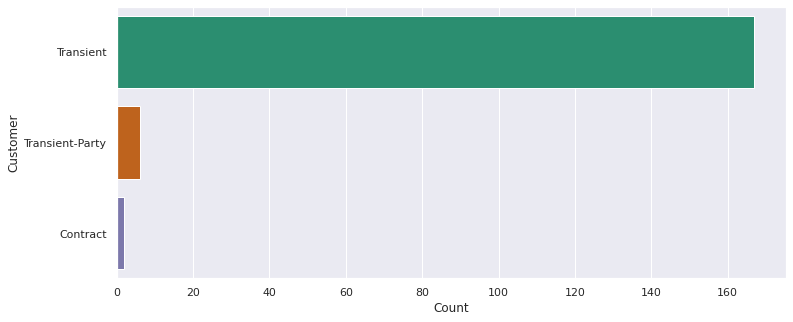

,Customer,Count
0,Transient,167
1,Transient-Party,6
2,Contract,2


In [71]:
m=x.customer_type.value_counts().rename_axis('Customer').reset_index(name='Count')
sns.barplot(y=m.Customer,x=m.Count,palette='Dark2')
plt.show()
m

Mostly guestes with babies and children are of type Transient.

#### Q: Do Guestes tend to cancel the bookings if booked room is not assigned to them ?

In [72]:
a=df_room_type[df_room_type.Same_room==0]
a.is_canceled.value_counts()

0    14115
1      802
Name: is_canceled, dtype: int64

A : No, Only 6 % of guests canceled the bookings when same room type is not assigned rest 94% didnot cancel their booking.

## <b>Lead Time Analysis</b>

In [73]:
print(df.lead_time.quantile(0.95))

320.0


In [74]:
pd.set_option('display.max_columns', None)
df_lead_time_analysis=df[df['lead_time']>320]
df_lead_time_analysis

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_numeric,arrival_date,Same_room,No_of_days_stayed
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,7,2015-07-01,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,7,2015-07-01,1,0
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40,0,0,Contract,55.68,0,0,Canceled,2015-05-19,7,2015-07-03,1,0
82,Resort Hotel,0,364,2015,July,27,3,3,7,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40,0,0,Contract,55.68,0,0,Check-Out,2015-07-13,7,2015-07-03,1,10
85,Resort Hotel,0,324,2015,July,27,3,4,10,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,40,0,0,Contract,134.73,0,0,Check-Out,2015-07-17,7,2015-07-03,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,City Hotel,0,323,2017,August,35,29,0,1,2,1,0,BB,ITA,Online TA,TA/TO,0,0,0,A,D,1,No Deposit,9,0,0,Transient,125.10,0,2,Check-Out,2017-08-30,8,2017-08-29,0,1
119148,City Hotel,0,457,2017,August,34,25,2,3,2,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,2,No Deposit,6,0,0,Transient-Party,122.40,0,1,Check-Out,2017-08-30,8,2017-08-25,1,5
119228,City Hotel,0,341,2017,August,35,27,2,3,2,1,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,22,0,0,Transient,96.91,0,1,Check-Out,2017-09-01,8,2017-08-27,1,5
119297,City Hotel,0,332,2017,August,35,31,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,F,4,No Deposit,9,0,0,Transient,170.80,0,2,Check-Out,2017-09-02,8,2017-08-31,0,2


In [75]:
df_lead_time_analysis.is_canceled.value_counts()

1    4000
0    1859
Name: is_canceled, dtype: int64

In [76]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [77]:
print(f'Percentage of Cancellations by guests having lead time greater than 320 is {round((4000*100)/44224,2)}%')

Percentage of Cancellations by guests having lead time greater than 320 is 9.04%


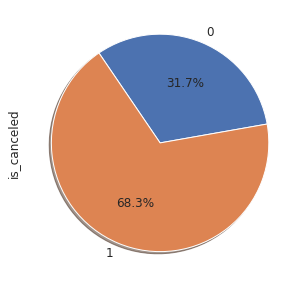

In [78]:
df_lead_time_analysis.is_canceled.value_counts()[::-1].plot(kind = 'pie', autopct='%1.1f%%', fontsize=12,startangle=10,shadow=True)
plt.show()

From this Pie plot it is quite evident that when Lead time is greater than 320 there are more cancellations happened which contributes to the 9.04% of total cancellation in entire dataset.

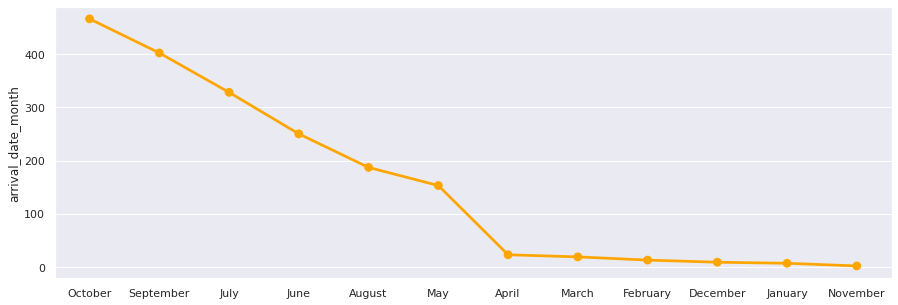

,arrival_date_month
October,466
September,402
July,328
June,250
August,187
May,153
April,23
March,19
February,13
December,9


In [79]:
x=pd.DataFrame(df_lead_time_analysis['arrival_date_month'][df_lead_time_analysis['is_canceled']==0].value_counts())
plt.figure(figsize=(15,5))
sns.pointplot(x=x.index,y=x.arrival_date_month,color='orange')
plt.show()
x

## <b>Days in Waiting List Analysis</b>

In [80]:
print(df.days_in_waiting_list.quantile(0.95))

0.0


In [81]:
df_waiting_list_analysis=df[df['days_in_waiting_list']>0]
df_waiting_list_analysis

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_numeric,arrival_date,Same_room,No_of_days_stayed
2272,Resort Hotel,0,59,2015,October,41,8,0,3,2,0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281,0,50,Contract,45.0,0,0,Check-Out,2015-10-11,10,2015-10-08,1,3
2486,Resort Hotel,0,47,2015,October,43,19,1,4,2,0,0,HB,ESP,Groups,Direct,0,0,0,A,A,0,No Deposit,0,0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,10,2015-10-19,1,5
2487,Resort Hotel,0,47,2015,October,43,19,1,4,2,0,0,HB,ESP,Groups,Direct,0,0,0,A,A,0,No Deposit,0,0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,10,2015-10-19,1,5
2488,Resort Hotel,0,47,2015,October,43,19,1,4,2,0,0,HB,ESP,Groups,Direct,0,0,0,A,A,0,No Deposit,0,0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,10,2015-10-19,1,5
2490,Resort Hotel,0,47,2015,October,43,19,1,4,2,0,0,HB,ESP,Groups,Direct,0,0,0,A,A,0,No Deposit,0,0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,10,2015-10-19,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111978,City Hotel,0,345,2017,May,19,13,2,3,2,0,0,BB,MOZ,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,467,0,36,Transient-Party,89.1,0,0,Check-Out,2017-05-18,5,2017-05-13,1,5
112021,City Hotel,0,34,2017,May,20,16,0,3,1,0,0,BB,ESP,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,474,0,9,Transient-Party,130.0,0,0,Check-Out,2017-05-19,5,2017-05-16,1,3
112822,City Hotel,0,344,2017,May,21,27,1,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,12,0,98,Transient-Party,128.0,0,1,Check-Out,2017-05-29,5,2017-05-27,1,2
114733,City Hotel,0,322,2017,June,25,23,2,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,3,No Deposit,37,0,59,Transient-Party,105.0,0,3,Check-Out,2017-06-27,6,2017-06-23,1,4


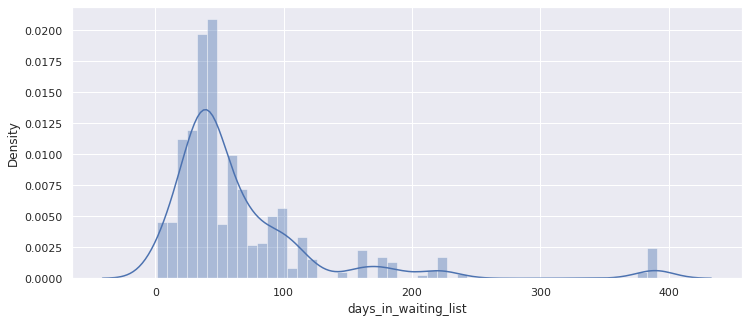

In [82]:
sns.distplot(df_waiting_list_analysis[df_waiting_list_analysis.is_canceled==1]['days_in_waiting_list'])
plt.show()

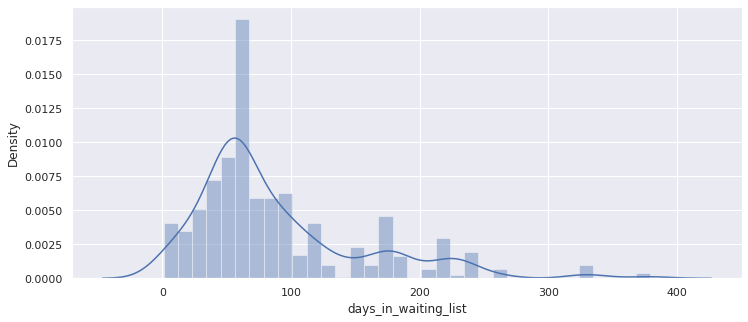

In [83]:
sns.distplot(df_waiting_list_analysis[df_waiting_list_analysis.is_canceled==0]['days_in_waiting_list'])
plt.show()

In [84]:
df_waiting_list_analysis.is_canceled.value_counts()

1    2359
0    1339
Name: is_canceled, dtype: int64

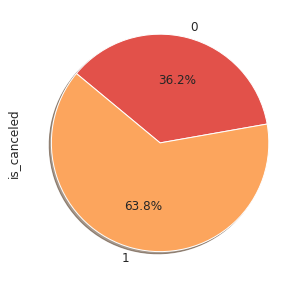

In [85]:
color=sns.color_palette(palette='Spectral')
df_waiting_list_analysis.is_canceled.value_counts()[::-1].plot(kind = 'pie', autopct='%1.1f%%', fontsize=12,startangle=10,shadow=True,colors=color)
plt.show()

When days_in_waiting_list is greater than 0, 63.8 % people tend to cancel their bookings which is almost double the non canceled ones

## <b> No of Days Stayed Analysis</b>

In [86]:
print(df.No_of_days_stayed.quantile(0.95))

7.0


In [87]:
no_of_days_df_analysis=df[df.No_of_days_stayed>7]
no_of_days_df_analysis

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_numeric,arrival_date,Same_room,No_of_days_stayed
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,0,0,0,Transient,62.00,0,2,Check-Out,2015-07-15,7,2015-07-01,1,14
31,Resort Hotel,0,95,2015,July,27,1,4,11,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,241,0,0,Transient,63.86,0,0,Check-Out,2015-07-16,7,2015-07-01,1,15
51,Resort Hotel,0,93,2015,July,27,2,3,8,2,0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,156,0,0,Contract,56.01,0,0,Check-Out,2015-07-13,7,2015-07-02,1,11
52,Resort Hotel,0,76,2015,July,27,2,4,10,2,0,0,BB,OMN,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,243,0,0,Contract,110.70,0,0,Check-Out,2015-07-16,7,2015-07-02,1,14
79,Resort Hotel,0,81,2015,July,27,3,2,6,3,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,5,0,0,Transient,85.86,0,0,Check-Out,2015-07-11,7,2015-07-03,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119260,City Hotel,0,292,2017,August,34,20,4,8,2,0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,128.10,0,2,Check-Out,2017-09-01,8,2017-08-20,1,12
119292,City Hotel,0,75,2017,August,34,23,2,8,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,81.00,0,0,Check-Out,2017-09-02,8,2017-08-23,1,10
119365,City Hotel,0,54,2017,August,35,27,3,5,1,0,0,BB,JPN,Direct,Direct,0,0,0,G,G,0,No Deposit,14,0,0,Transient,266.75,0,1,Check-Out,2017-09-04,8,2017-08-27,1,8
119369,City Hotel,0,207,2017,August,34,25,3,7,2,0,0,BB,GBR,Direct,Direct,0,0,0,A,A,0,No Deposit,14,0,0,Transient,96.25,0,2,Check-Out,2017-09-04,8,2017-08-25,1,10


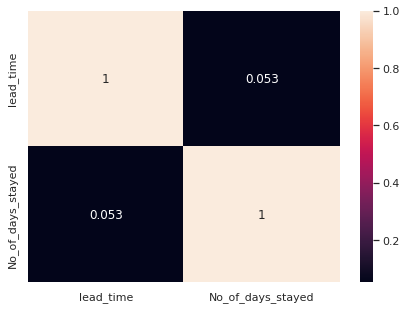

In [88]:
plt.figure(figsize=(7,5))
correlation=no_of_days_df_analysis[['lead_time','No_of_days_stayed']].corr()
sns.heatmap(correlation,annot=True)
plt.show()

### Q : Are guests staying for more than 7 days during peak season ? If yes, are bookings made in advance?

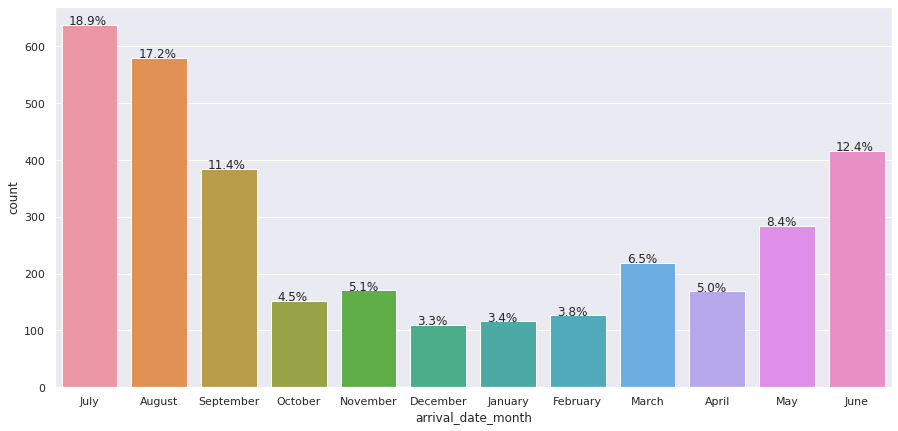

In [89]:
plt.figure(figsize=(15,7))
ax=sns.countplot(no_of_days_df_analysis.arrival_date_month)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(no_of_days_df_analysis['arrival_date_month'])),(p.get_x()+0.1, p.get_height()))
plt.show()

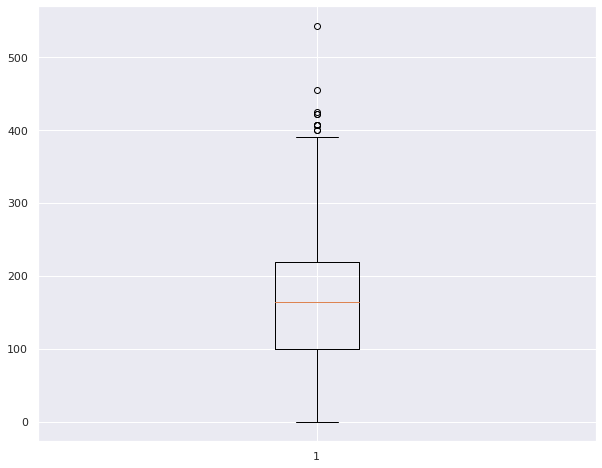

In [90]:
plt.figure(figsize=(10,8))
plt.boxplot(no_of_days_df_analysis[(no_of_days_df_analysis.arrival_date_month_numeric>4) &(no_of_days_df_analysis.arrival_date_month_numeric<10)]['lead_time'])
plt.show()

A : Majority of guests are arriving during the months of summer which is a peak season and wherever number of stay days is greater than 7 during the peak season there is a lead time greater than 100 days for 75% of the guests

## <b>Country Wise Analysis</b>

In [201]:
df_country=df.country.value_counts().rename_axis('Country').reset_index(name='Count')
df_country

,Country,Count
0,PRT,49078
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
...,...,...
172,DJI,1
173,BWA,1
174,HND,1
175,VGB,1


In [95]:
df_country.describe()

,Count
count,177.000000
mean,674.519774
std,3964.977415
min,1.000000
25%,2.000000
50%,12.000000
75%,74.000000
max,49078.000000


75% value of country's count is less than 74 whereas maximum value is 49078.

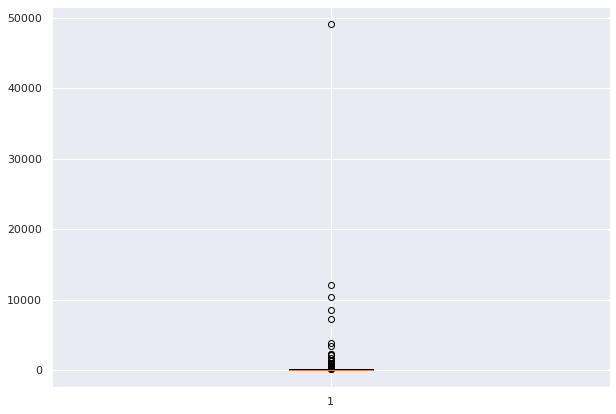

In [96]:
plt.figure(figsize=(10,7))
plt.boxplot(df_country.Count)
plt.show()

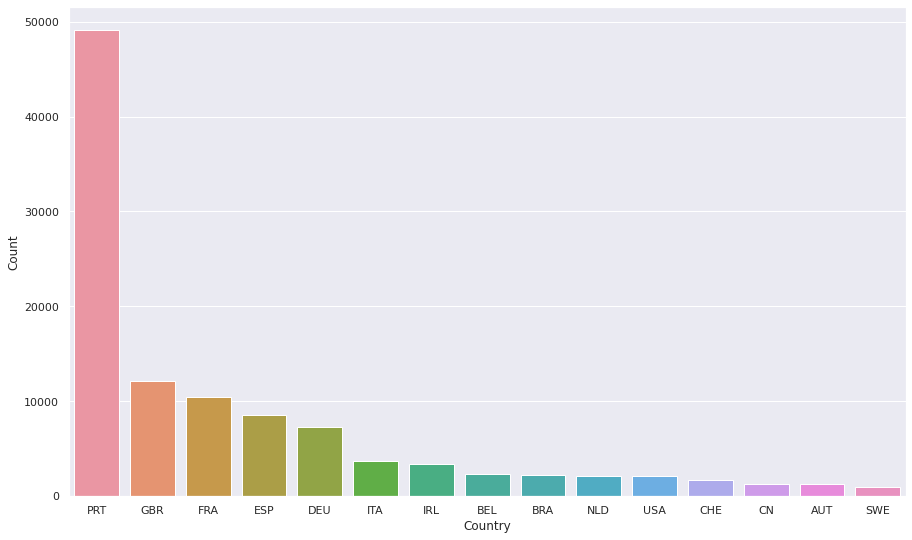

In [97]:
plt.figure(figsize=(15,9))
sns.barplot(x=df_country[df_country.Count>1000]['Country'],y=df_country[df_country.Count>1000]['Count'])
plt.show()

Most of the guests are visiting country PRT

In [98]:
df[df.country=='PRT']['is_canceled'].value_counts()

1    27586
0    21492
Name: is_canceled, dtype: int64

In [99]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [204]:
def country_name(country):
  '''This method would return Country Name when 2 Letters or 
  3 letters Country Code is paased'''
  if len(country)==2:
    return pycountry.countries.get(alpha_2=str(country)).name
  if len(country)==3:
    return pycountry.countries.get(alpha_3=str(country)).name
  else:
    return None

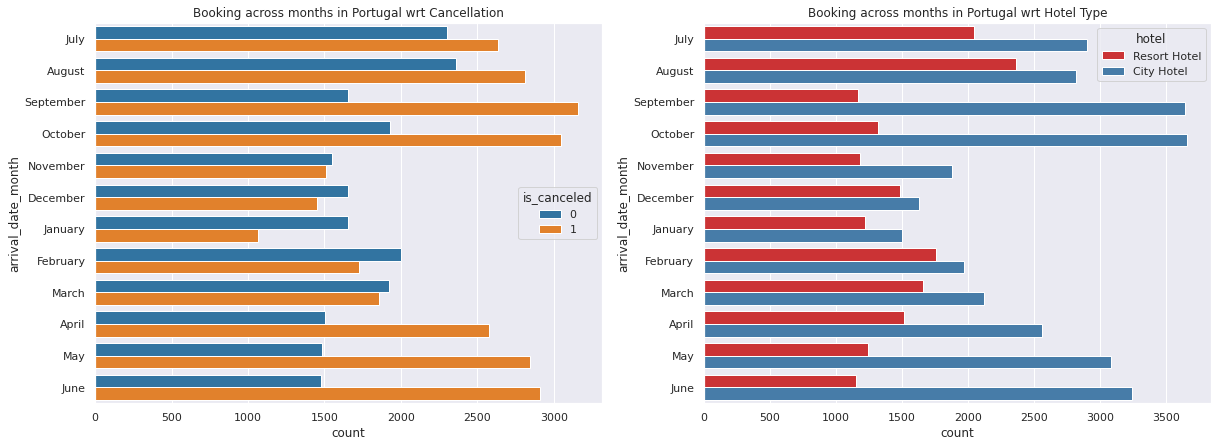

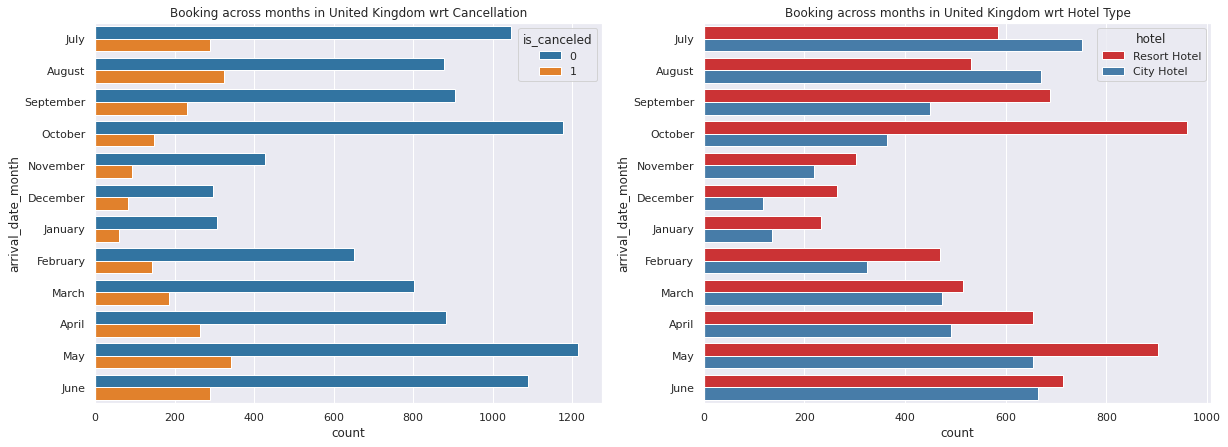

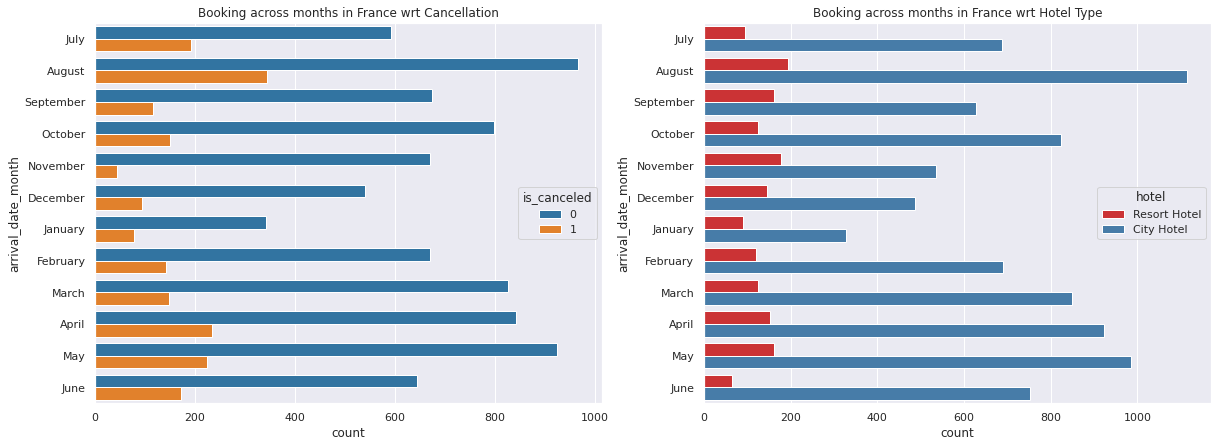

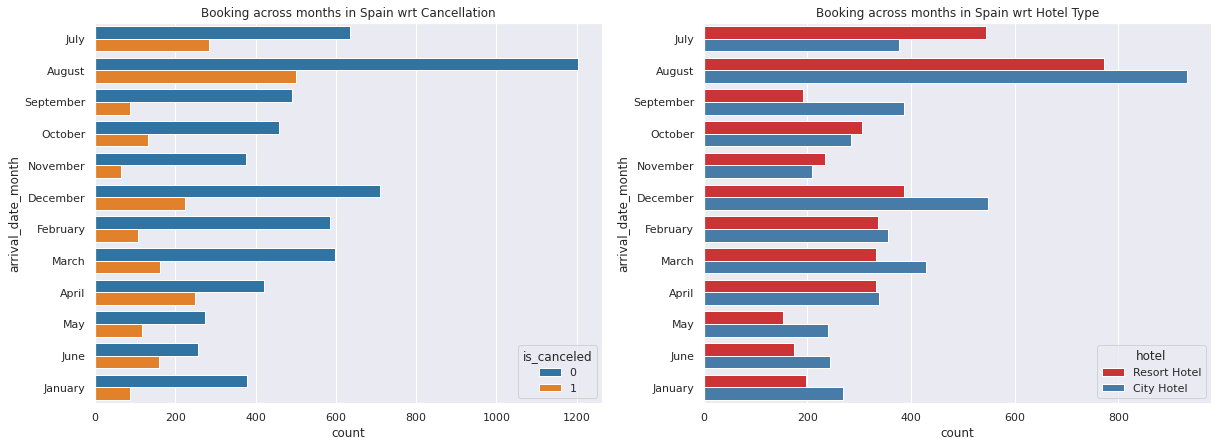

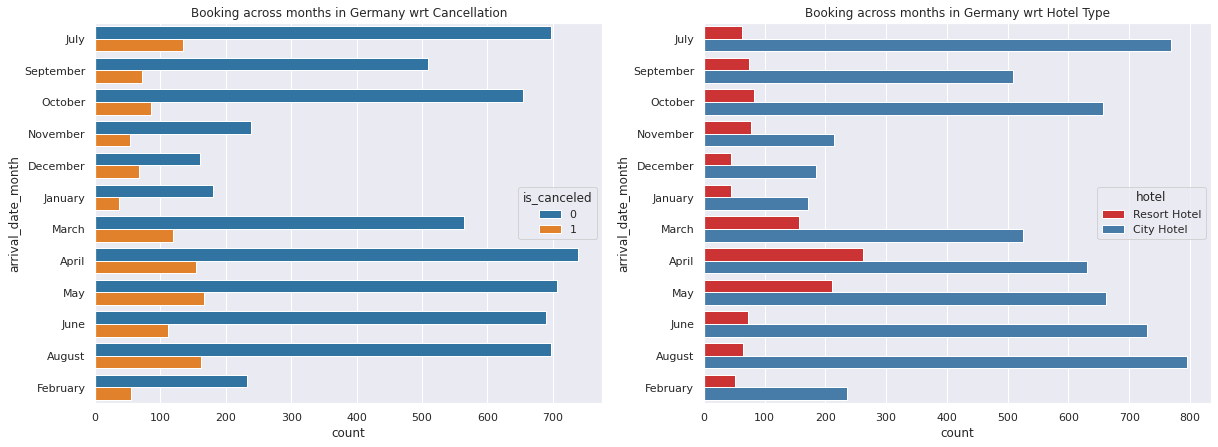

In [218]:
top_countries=df_country[df_country.Count>7000]
top_countries['Country_Name']=top_countries.apply(lambda x:country_name(x['Country']),axis=1)
for index,column in enumerate(top_countries['Country']):
  n=df[df.country==column]
  plt.figure(figsize=(20,7))
  plt.subplot(1, 2, 1)  
  sns.countplot(y=n.arrival_date_month,palette='tab10',hue=n.is_canceled)
  plt.title('Booking across months in '+top_countries['Country_Name'][index]+' wrt Cancellation')
  plt.subplot(1, 2, 2)
  sns.countplot(y=n.arrival_date_month,palette='Set1',hue=n.hotel)
  plt.title('Booking across months in '+top_countries['Country_Name'][index]+' wrt Hotel Type')
  plt.show()

1. Suprisingly for Portugal cancellations are higher than bookings from April to October
2. Except July & August guests have booked more resort than hotel in United Kingdom
3. In France and Germany, Guests have highly preferred Hotels over Resorts and Cancellarion rate in these two countries is low
4. In Spain, Guests prefer Resort as well as Hotel and August is the peak Season in Spain